In [74]:
import pandas as pd
import preprocessing_hw3 as pp
import seaborn as sb
import numpy as np

First, I will read in the data from donorschoose.com. Students reached is an important continuous variable that I will want to use as a feature so I will fill in missing values from that field with the mean value of that column.

In [75]:
project = pd.read_csv("projects_2012_2013.csv")

In [76]:
project.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_metro', 'school_district', 'school_county', 'school_charter',
       'school_magnet', 'teacher_prefix', 'primary_focus_subject',
       'primary_focus_area', 'secondary_focus_subject', 'secondary_focus_area',
       'resource_type', 'poverty_level', 'grade_level',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'date_posted', 'datefullyfunded'],
      dtype='object')

In [77]:
project['date_posted'] = pd.to_datetime(project.date_posted)
project['datefullyfunded'] = pd.to_datetime(project.datefullyfunded)
project['days_funded'] = project['datefullyfunded'] - project['date_posted']
project['over_60'] = np.where(project['days_funded'].dt.days > 60, 1, 0)

Create training, test sets and then impute missing and create dummies on the training portion of the training.

In [78]:
train_test_sets = pp.time_split_df(project, 'date_posted', 3)
train_test_sets, features = pp.process_sets(train_test_sets)

C:\Users\Krista CHAN!\Documents\GitHub\mlforpublicpolicy\Homework 2, 3\preprocessing_hw3.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  project['students_reached'].mean())


I can now loop through various models and thresholds for each training and test set to view evaluation metrics and compare performance between models. Below are the date ranges on date_posted for each training and test set.

In [79]:
print("Train set 1: " + str(train_test_sets[0][0].date_posted.min()) + " - " + str(train_test_sets[0][0].date_posted.max()))
print("Test set 1: " + str(train_test_sets[0][1].date_posted.min()) + " - " + str(train_test_sets[0][1].date_posted.max()))
print()
print("Train set 2: " + str(train_test_sets[1][0].date_posted.min()) + " - " + str(train_test_sets[1][0].date_posted.max()))
print("Test set 2: " + str(train_test_sets[1][1].date_posted.min()) + " - " + str(train_test_sets[1][1].date_posted.max()))
print()
print("Train set 3: " + str(train_test_sets[2][0].date_posted.min()) + " - " + str(train_test_sets[2][0].date_posted.max()))
print("Test set 3: " + str(train_test_sets[2][1].date_posted.min()) + " - " + str(train_test_sets[2][1].date_posted.max()))

Train set 1: 2012-01-01 00:00:00 - 2012-07-01 00:00:00
Test set 1: 2012-08-31 00:00:00 - 2012-12-30 00:00:00

Train set 2: 2012-01-01 00:00:00 - 2012-12-30 00:00:00
Test set 2: 2013-03-01 00:00:00 - 2013-07-01 00:00:00

Train set 3: 2012-01-01 00:00:00 - 2013-07-01 00:00:00
Test set 3: 2013-08-31 00:00:00 - 2013-12-30 00:00:00


Training and test set 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Random Forest n_estimators: 10
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.02:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.05:

True negatives: 7.00
False positives: 18551.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.1:

True negatives: 290.00
False po

<Figure size 432x288 with 0 Axes>

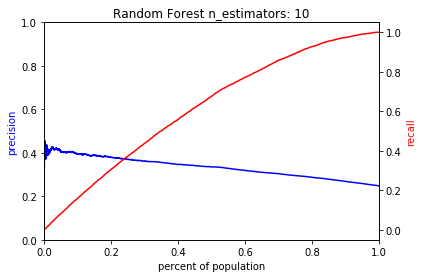

----------

Random Forest n_estimators: 20
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.02:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.05:

True negatives: 7.00
False positives: 18551.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.1:

True negatives: 290

<Figure size 432x288 with 0 Axes>

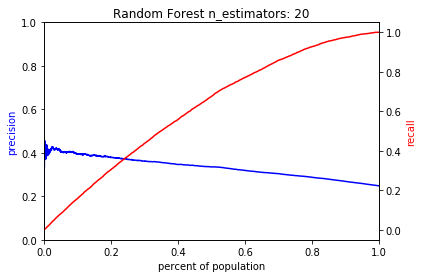

----------

Random Forest max_depth: 5
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.02:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.05:

True negatives: 7.00
False positives: 18551.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.1:

True negatives: 290.00


<Figure size 432x288 with 0 Axes>

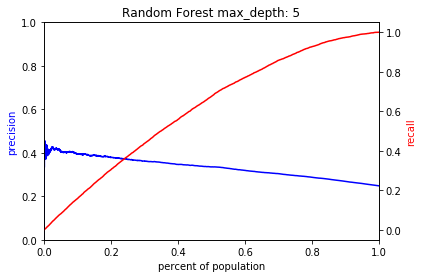

----------

Random Forest max_depth: 10
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.02:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.05:

True negatives: 7.00
False positives: 18551.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.1:

True negatives: 290.00

<Figure size 432x288 with 0 Axes>

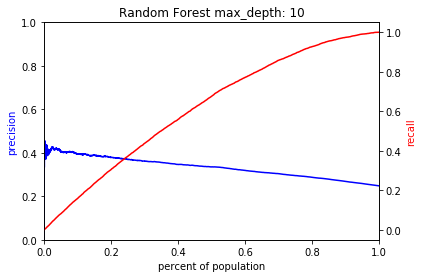

----------

Random Forest max_features: sqrt
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.02:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.05:

True negatives: 7.00
False positives: 18551.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.1:

True negatives: 2

<Figure size 432x288 with 0 Axes>

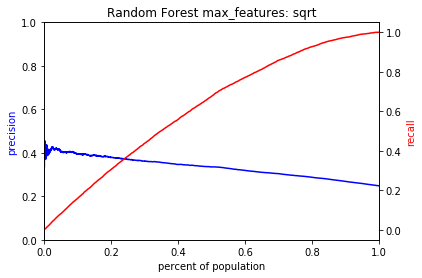

----------

Random Forest max_features: log2
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.02:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.05:

True negatives: 7.00
False positives: 18551.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.1:

True negatives: 2

<Figure size 432x288 with 0 Axes>

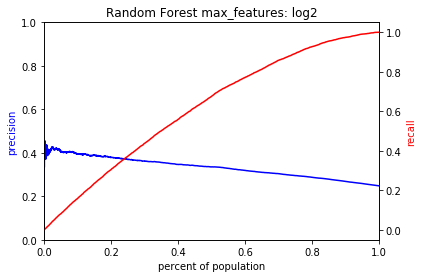

----------

Random Forest min_samples_split: 2
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.02:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.05:

True negatives: 7.00
False positives: 18551.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.1:

True negatives:

<Figure size 432x288 with 0 Axes>

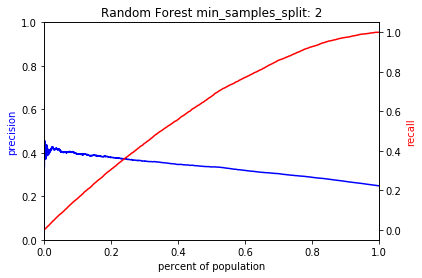

----------

Random Forest min_samples_split: 10
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.02:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.05:

True negatives: 7.00
False positives: 18551.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.1:

True negatives

<Figure size 432x288 with 0 Axes>

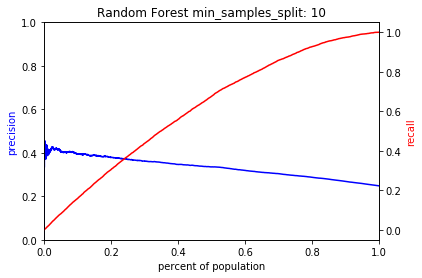

----------

Random Forest n_jobs: -1
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.02:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.05:

True negatives: 7.00
False positives: 18551.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.1:

True negatives: 290.00
Fa

<Figure size 432x288 with 0 Axes>

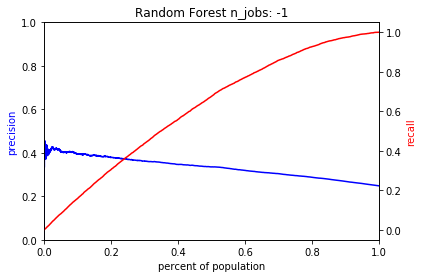

----------

Ada Boost algorithm: SAMME
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 10, 'random_state': N

<Figure size 432x288 with 0 Axes>

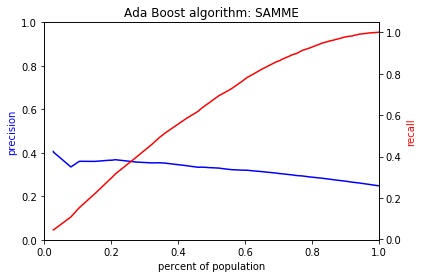

----------

Ada Boost algorithm: SAMME.R
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 10, 'random_state':

<Figure size 432x288 with 0 Axes>

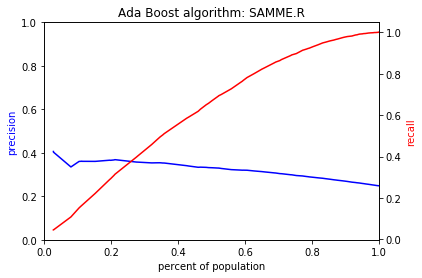

----------

Ada Boost n_estimators: 1
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 10, 'random_state': No

<Figure size 432x288 with 0 Axes>

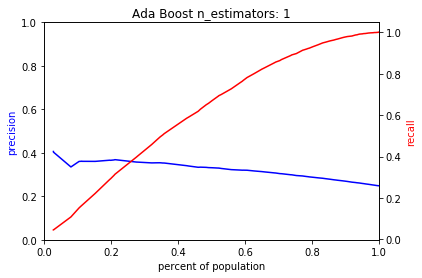

----------

Ada Boost n_estimators: 10
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 10, 'random_state': N

<Figure size 432x288 with 0 Axes>

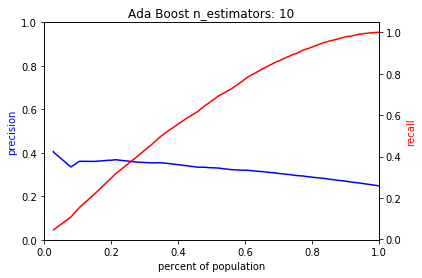

----------

Logistic Regression penalty: l1
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.02:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.05:

True negatives: 29.00
False positives: 18529.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.1:

True negatives: 72.00
False positives: 18486.00
False negatives: 4.00
True positives: 6125.00

    accuracy 0.25
    precision 0.25
    rec

<Figure size 432x288 with 0 Axes>

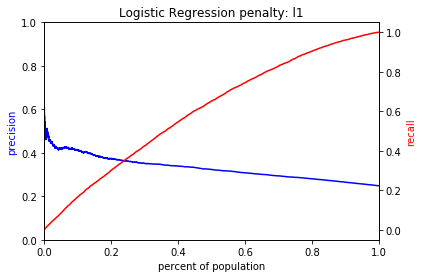

----------

Logistic Regression penalty: l2
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.02:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.05:

True negatives: 29.00
False positives: 18529.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.1:

True negatives: 72.00
False positives: 18486.00
False negatives: 4.00
True positives: 6125.00

    accuracy 0.25
    precision 0.25
    rec

<Figure size 432x288 with 0 Axes>

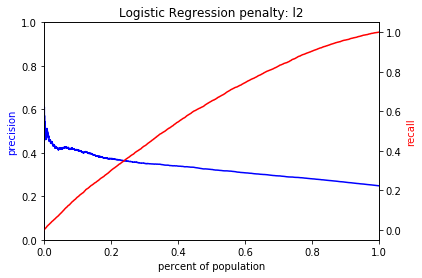

----------

Logistic Regression C: 0.001
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.02:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.05:

True negatives: 29.00
False positives: 18529.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.1:

True negatives: 72.00
False positives: 18486.00
False negatives: 4.00
True positives: 6125.00

    accuracy 0.25
    precision 0.25
    recall

<Figure size 432x288 with 0 Axes>

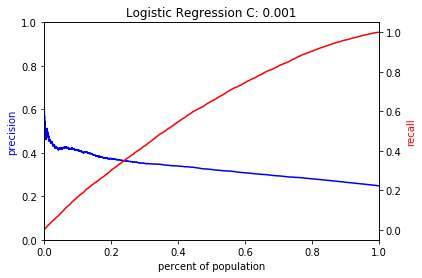

----------

Logistic Regression C: 0.1
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.02:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.05:

True negatives: 29.00
False positives: 18529.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.1:

True negatives: 72.00
False positives: 18486.00
False negatives: 4.00
True positives: 6125.00

    accuracy 0.25
    precision 0.25
    recall 1

<Figure size 432x288 with 0 Axes>

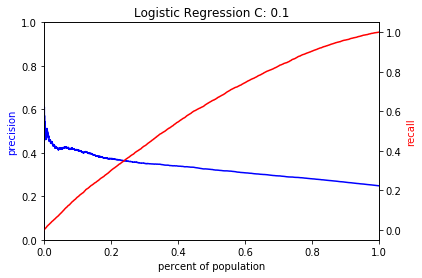

----------

Logistic Regression C: 1
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.02:

True negatives: 0.00
False positives: 18558.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.05:

True negatives: 29.00
False positives: 18529.00
False negatives: 0.00
True positives: 6129.00

    accuracy 0.25
    precision 0.25
    recall 1.00
    f1 0.40

At threshold 0.1:

True negatives: 72.00
False positives: 18486.00
False negatives: 4.00
True positives: 6125.00

    accuracy 0.25
    precision 0.25
    recall 1.0

<Figure size 432x288 with 0 Axes>

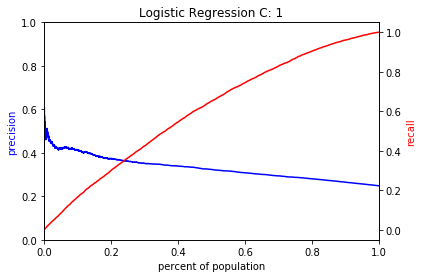

----------

SVM penalty: l2
{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 0, 'tol': 0.0001, 'verbose': 0}

At threshold 0.01:

True negatives: 18558.00
False positives: 0.00
False negatives: 6129.00
True positives: 0.00

    accuracy 0.75
    precision nan
    recall 0.00
    f1 nan


C:\Users\Krista CHAN!\Documents\GitHub\mlforpublicpolicy\Homework 2, 3\preprocessing_hw3.py:195: RuntimeWarning: invalid value encountered in double_scalars
  _, false_positive, _, true_positives = \



At threshold 0.02:

True negatives: 18558.00
False positives: 0.00
False negatives: 6129.00
True positives: 0.00

    accuracy 0.75
    precision nan
    recall 0.00
    f1 nan

At threshold 0.05:

True negatives: 18558.00
False positives: 0.00
False negatives: 6129.00
True positives: 0.00

    accuracy 0.75
    precision nan
    recall 0.00
    f1 nan

At threshold 0.1:

True negatives: 18558.00
False positives: 0.00
False negatives: 6129.00
True positives: 0.00

    accuracy 0.75
    precision nan
    recall 0.00
    f1 nan

At threshold 0.2:

True negatives: 18558.00
False positives: 0.00
False negatives: 6129.00
True positives: 0.00

    accuracy 0.75
    precision nan
    recall 0.00
    f1 nan

At threshold 0.3:

True negatives: 18558.00
False positives: 0.00
False negatives: 6129.00
True positives: 0.00

    accuracy 0.75
    precision nan
    recall 0.00
    f1 nan

At threshold 0.5:

True negatives: 18558.00
False positives: 0.00
False negatives: 6129.00
True positives: 0.00


<Figure size 432x288 with 0 Axes>

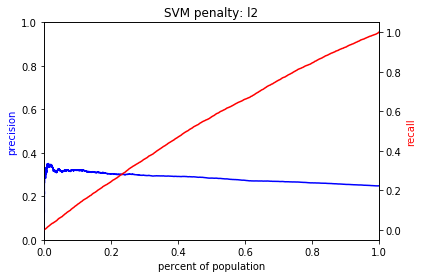

----------

Decision Tree criterion: gini
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.02:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.05:

True negatives: 815.00
False positives: 17743.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.28
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.1:

True negatives: 1514.00
False positives: 17044.00
False negatives: 208.00
Tr

<Figure size 432x288 with 0 Axes>

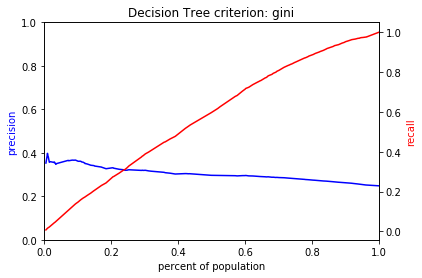

----------

Decision Tree criterion: entropy
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.02:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.05:

True negatives: 815.00
False positives: 17743.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.28
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.1:

True negatives: 1514.00
False positives: 17044.00
False negatives: 208.00

<Figure size 432x288 with 0 Axes>

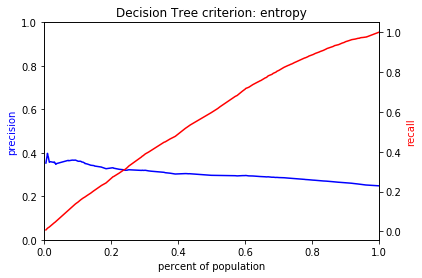

----------

Decision Tree max_depth: 1
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.02:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.05:

True negatives: 815.00
False positives: 17743.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.28
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.1:

True negatives: 1514.00
False positives: 17044.00
False negatives: 208.00
True 

<Figure size 432x288 with 0 Axes>

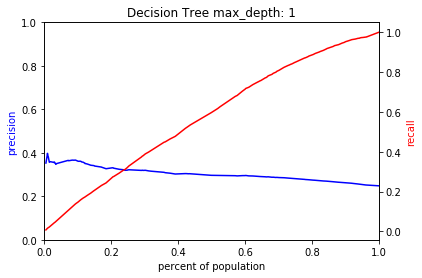

----------

Decision Tree max_depth: 5
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.02:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.05:

True negatives: 815.00
False positives: 17743.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.28
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.1:

True negatives: 1514.00
False positives: 17044.00
False negatives: 208.00
True 

<Figure size 432x288 with 0 Axes>

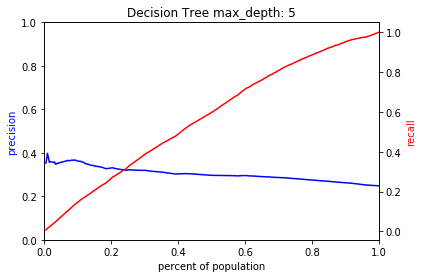

----------

Decision Tree max_depth: 10
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.02:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.05:

True negatives: 815.00
False positives: 17743.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.28
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.1:

True negatives: 1514.00
False positives: 17044.00
False negatives: 208.00
True

<Figure size 432x288 with 0 Axes>

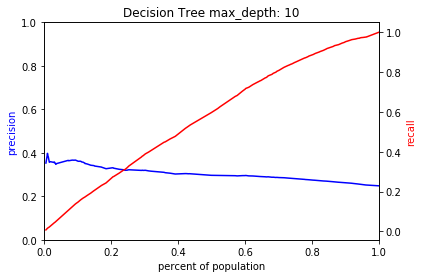

----------

Decision Tree max_features: None
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.02:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.05:

True negatives: 815.00
False positives: 17743.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.28
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.1:

True negatives: 1514.00
False positives: 17044.00
False negatives: 208.00

<Figure size 432x288 with 0 Axes>

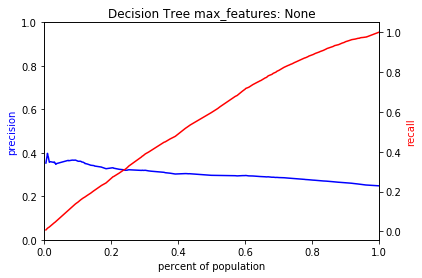

----------

Decision Tree max_features: sqrt
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.02:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.05:

True negatives: 815.00
False positives: 17743.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.28
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.1:

True negatives: 1514.00
False positives: 17044.00
False negatives: 208.00

<Figure size 432x288 with 0 Axes>

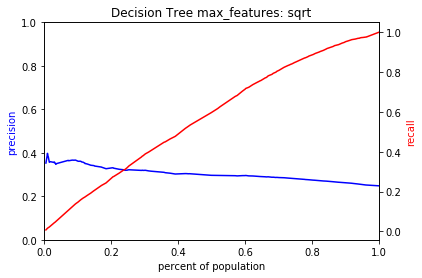

----------

Decision Tree max_features: log2
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.02:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.05:

True negatives: 815.00
False positives: 17743.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.28
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.1:

True negatives: 1514.00
False positives: 17044.00
False negatives: 208.00

<Figure size 432x288 with 0 Axes>

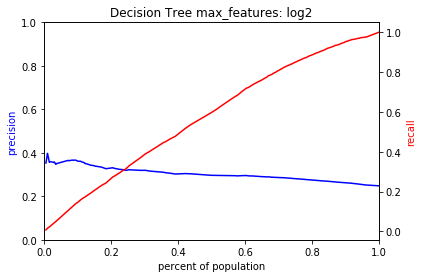

----------

Decision Tree min_samples_split: 2
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.02:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.05:

True negatives: 815.00
False positives: 17743.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.28
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.1:

True negatives: 1514.00
False positives: 17044.00
False negatives: 208.

<Figure size 432x288 with 0 Axes>

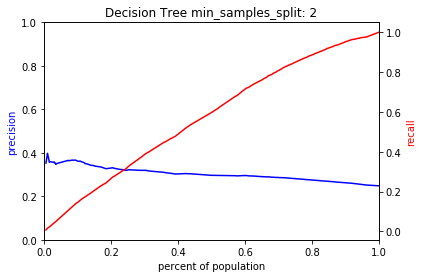

----------

Decision Tree min_samples_split: 5
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.02:

True negatives: 699.00
False positives: 17859.00
False negatives: 136.00
True positives: 5993.00

    accuracy 0.27
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.05:

True negatives: 815.00
False positives: 17743.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.28
    precision 0.25
    recall 0.98
    f1 0.40

At threshold 0.1:

True negatives: 1514.00
False positives: 17044.00
False negatives: 208.

<Figure size 432x288 with 0 Axes>

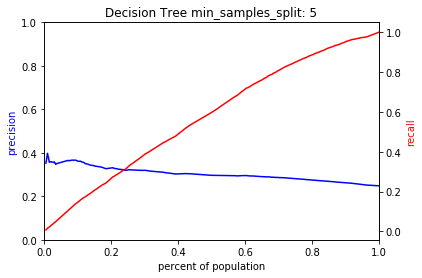

----------

KNN n_neighbors: 1
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 1137.00
False positives: 17421.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.29
    precision 0.26
    recall 0.98
    f1 0.41

At threshold 0.02:

True negatives: 1137.00
False positives: 17421.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.29
    precision 0.26
    recall 0.98
    f1 0.41

At threshold 0.05:

True negatives: 1178.00
False positives: 17380.00
False negatives: 156.00
True positives: 5973.00

    accuracy 0.29
    precision 0.26
    recall 0.97
    f1 0.41

At threshold 0.1:

True negatives: 2861.00
False positives: 15697.00
False negatives: 470.00
True positives: 5659.00

    accuracy 0.35
    precision 0.26
    recall 0.92
    f1 0.41

At threshold 0.2:

True negatives: 5958.00
False positives: 12600.00
False 

<Figure size 432x288 with 0 Axes>

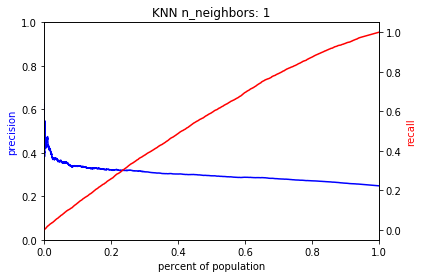

----------

KNN n_neighbors: 5
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 1137.00
False positives: 17421.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.29
    precision 0.26
    recall 0.98
    f1 0.41

At threshold 0.02:

True negatives: 1137.00
False positives: 17421.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.29
    precision 0.26
    recall 0.98
    f1 0.41

At threshold 0.05:

True negatives: 1178.00
False positives: 17380.00
False negatives: 156.00
True positives: 5973.00

    accuracy 0.29
    precision 0.26
    recall 0.97
    f1 0.41

At threshold 0.1:

True negatives: 2861.00
False positives: 15697.00
False negatives: 470.00
True positives: 5659.00

    accuracy 0.35
    precision 0.26
    recall 0.92
    f1 0.41

At threshold 0.2:

True negatives: 5958.00
False positives: 12600.00
False 

<Figure size 432x288 with 0 Axes>

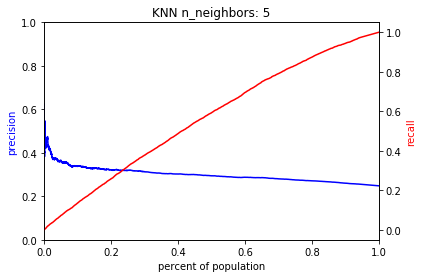

----------

KNN n_neighbors: 10
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 1137.00
False positives: 17421.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.29
    precision 0.26
    recall 0.98
    f1 0.41

At threshold 0.02:

True negatives: 1137.00
False positives: 17421.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.29
    precision 0.26
    recall 0.98
    f1 0.41

At threshold 0.05:

True negatives: 1178.00
False positives: 17380.00
False negatives: 156.00
True positives: 5973.00

    accuracy 0.29
    precision 0.26
    recall 0.97
    f1 0.41

At threshold 0.1:

True negatives: 2861.00
False positives: 15697.00
False negatives: 470.00
True positives: 5659.00

    accuracy 0.35
    precision 0.26
    recall 0.92
    f1 0.41

At threshold 0.2:

True negatives: 5958.00
False positives: 12600.00
False

<Figure size 432x288 with 0 Axes>

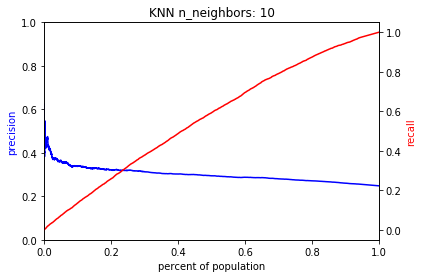

----------

KNN weights: uniform
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 1137.00
False positives: 17421.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.29
    precision 0.26
    recall 0.98
    f1 0.41

At threshold 0.02:

True negatives: 1137.00
False positives: 17421.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.29
    precision 0.26
    recall 0.98
    f1 0.41

At threshold 0.05:

True negatives: 1178.00
False positives: 17380.00
False negatives: 156.00
True positives: 5973.00

    accuracy 0.29
    precision 0.26
    recall 0.97
    f1 0.41

At threshold 0.1:

True negatives: 2861.00
False positives: 15697.00
False negatives: 470.00
True positives: 5659.00

    accuracy 0.35
    precision 0.26
    recall 0.92
    f1 0.41

At threshold 0.2:

True negatives: 5958.00
False positives: 12600.00
Fals

<Figure size 432x288 with 0 Axes>

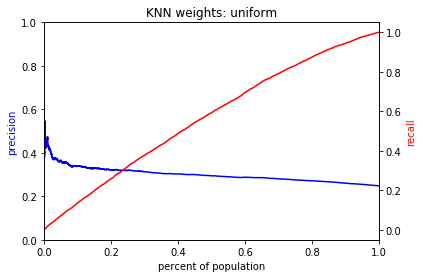

----------

KNN weights: distance
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 1137.00
False positives: 17421.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.29
    precision 0.26
    recall 0.98
    f1 0.41

At threshold 0.02:

True negatives: 1137.00
False positives: 17421.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.29
    precision 0.26
    recall 0.98
    f1 0.41

At threshold 0.05:

True negatives: 1178.00
False positives: 17380.00
False negatives: 156.00
True positives: 5973.00

    accuracy 0.29
    precision 0.26
    recall 0.97
    f1 0.41

At threshold 0.1:

True negatives: 2861.00
False positives: 15697.00
False negatives: 470.00
True positives: 5659.00

    accuracy 0.35
    precision 0.26
    recall 0.92
    f1 0.41

At threshold 0.2:

True negatives: 5958.00
False positives: 12600.00
Fal

<Figure size 432x288 with 0 Axes>

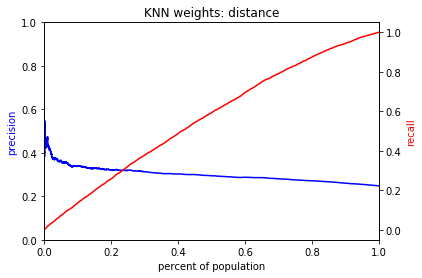

----------

KNN algorithm: auto
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 1137.00
False positives: 17421.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.29
    precision 0.26
    recall 0.98
    f1 0.41

At threshold 0.02:

True negatives: 1137.00
False positives: 17421.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.29
    precision 0.26
    recall 0.98
    f1 0.41

At threshold 0.05:

True negatives: 1178.00
False positives: 17380.00
False negatives: 156.00
True positives: 5973.00

    accuracy 0.29
    precision 0.26
    recall 0.97
    f1 0.41

At threshold 0.1:

True negatives: 2861.00
False positives: 15697.00
False negatives: 470.00
True positives: 5659.00

    accuracy 0.35
    precision 0.26
    recall 0.92
    f1 0.41

At threshold 0.2:

True negatives: 5958.00
False positives: 12600.00
False

<Figure size 432x288 with 0 Axes>

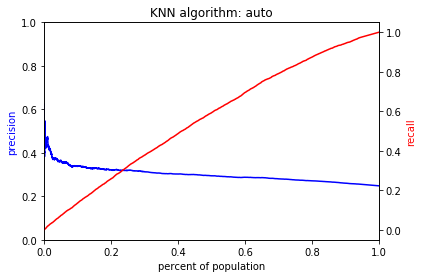

----------

KNN algorithm: ball_tree
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 1137.00
False positives: 17421.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.29
    precision 0.26
    recall 0.98
    f1 0.41

At threshold 0.02:

True negatives: 1137.00
False positives: 17421.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.29
    precision 0.26
    recall 0.98
    f1 0.41

At threshold 0.05:

True negatives: 1178.00
False positives: 17380.00
False negatives: 156.00
True positives: 5973.00

    accuracy 0.29
    precision 0.26
    recall 0.97
    f1 0.41

At threshold 0.1:

True negatives: 2861.00
False positives: 15697.00
False negatives: 470.00
True positives: 5659.00

    accuracy 0.35
    precision 0.26
    recall 0.92
    f1 0.41

At threshold 0.2:

True negatives: 5958.00
False positives: 12600.00


<Figure size 432x288 with 0 Axes>

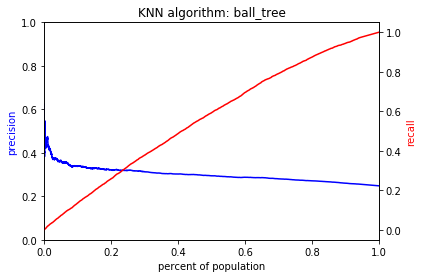

----------

KNN algorithm: kd_tree
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 1137.00
False positives: 17421.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.29
    precision 0.26
    recall 0.98
    f1 0.41

At threshold 0.02:

True negatives: 1137.00
False positives: 17421.00
False negatives: 149.00
True positives: 5980.00

    accuracy 0.29
    precision 0.26
    recall 0.98
    f1 0.41

At threshold 0.05:

True negatives: 1178.00
False positives: 17380.00
False negatives: 156.00
True positives: 5973.00

    accuracy 0.29
    precision 0.26
    recall 0.97
    f1 0.41

At threshold 0.1:

True negatives: 2861.00
False positives: 15697.00
False negatives: 470.00
True positives: 5659.00

    accuracy 0.35
    precision 0.26
    recall 0.92
    f1 0.41

At threshold 0.2:

True negatives: 5958.00
False positives: 12600.00
Fa

<Figure size 432x288 with 0 Axes>

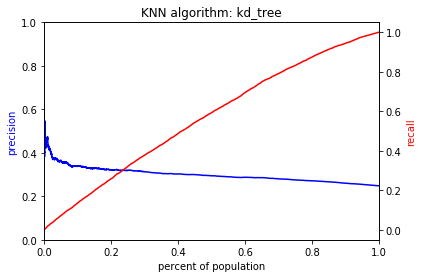

----------

Training and test set 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Random Forest n_estimators: 10
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.02:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.05:

True negatives: 4.00
False positives: 8960.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.1:

True negatives: 225.00
False posit

<Figure size 432x288 with 0 Axes>

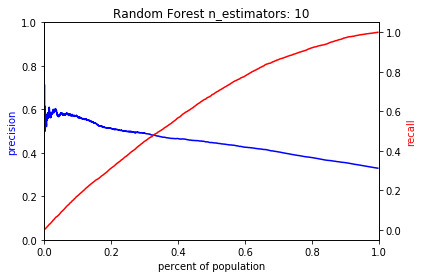

----------

Random Forest n_estimators: 20
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.02:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.05:

True negatives: 4.00
False positives: 8960.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.1:

True negatives: 225.00

<Figure size 432x288 with 0 Axes>

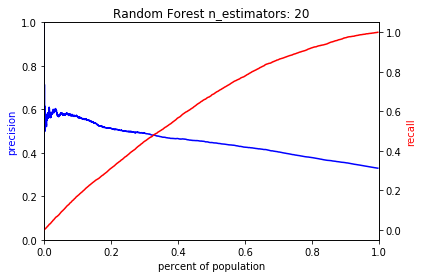

----------

Random Forest max_depth: 5
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.02:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.05:

True negatives: 4.00
False positives: 8960.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.1:

True negatives: 225.00
Fal

<Figure size 432x288 with 0 Axes>

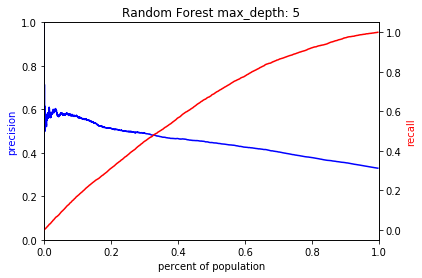

----------

Random Forest max_depth: 10
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.02:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.05:

True negatives: 4.00
False positives: 8960.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.1:

True negatives: 225.00
Fa

<Figure size 432x288 with 0 Axes>

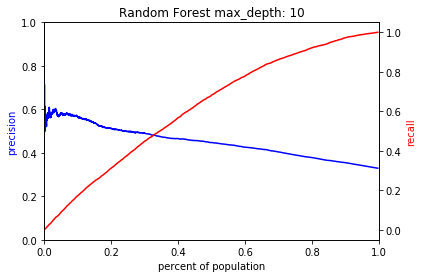

----------

Random Forest max_features: sqrt
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.02:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.05:

True negatives: 4.00
False positives: 8960.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.1:

True negatives: 225.

<Figure size 432x288 with 0 Axes>

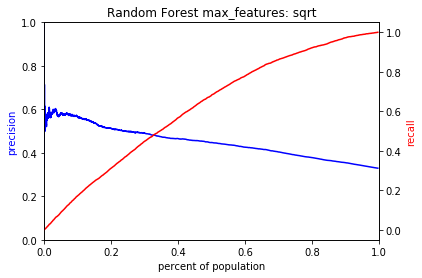

----------

Random Forest max_features: log2
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.02:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.05:

True negatives: 4.00
False positives: 8960.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.1:

True negatives: 225.

<Figure size 432x288 with 0 Axes>

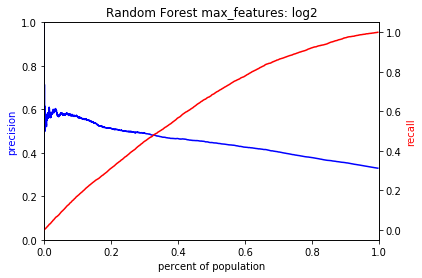

----------

Random Forest min_samples_split: 2
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.02:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.05:

True negatives: 4.00
False positives: 8960.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.1:

True negatives: 22

<Figure size 432x288 with 0 Axes>

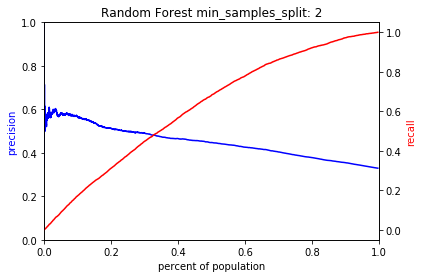

----------

Random Forest min_samples_split: 10
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.02:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.05:

True negatives: 4.00
False positives: 8960.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.1:

True negatives: 2

<Figure size 432x288 with 0 Axes>

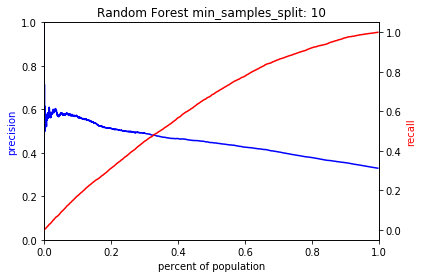

----------

Random Forest n_jobs: -1
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.02:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.05:

True negatives: 4.00
False positives: 8960.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.1:

True negatives: 225.00
False

<Figure size 432x288 with 0 Axes>

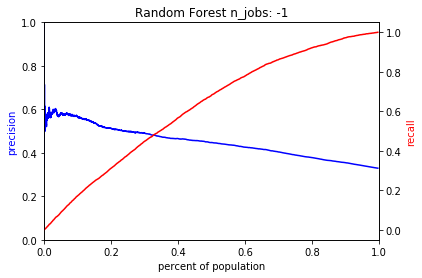

----------

Ada Boost algorithm: SAMME
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 10, 'random_state': N

<Figure size 432x288 with 0 Axes>

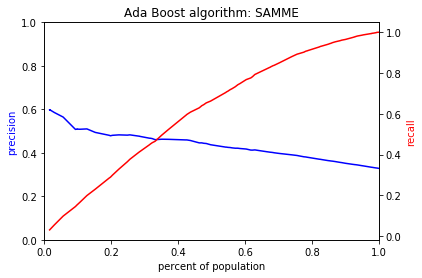

----------

Ada Boost algorithm: SAMME.R
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 10, 'random_state':

<Figure size 432x288 with 0 Axes>

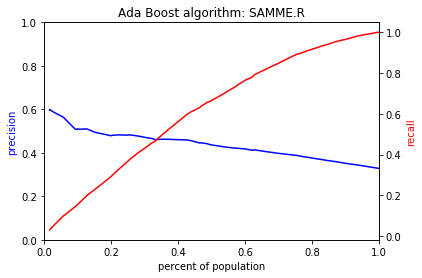

----------

Ada Boost n_estimators: 1
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 10, 'random_state': No

<Figure size 432x288 with 0 Axes>

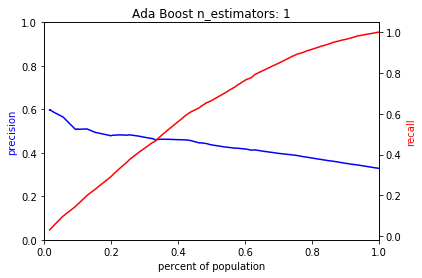

----------

Ada Boost n_estimators: 10
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 10, 'random_state': N

<Figure size 432x288 with 0 Axes>

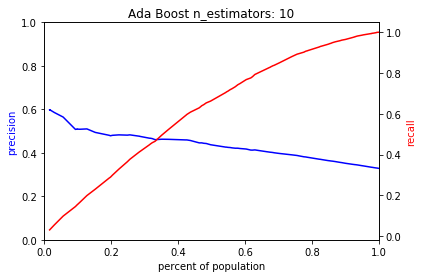

----------

Logistic Regression penalty: l1
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.02:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.05:

True negatives: 2.00
False positives: 8962.00
False negatives: 2.00
True positives: 4380.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.1:

True negatives: 20.00
False positives: 8944.00
False negatives: 5.00
True positives: 4377.00

    accuracy 0.33
    precision 0.33
    recall 1

<Figure size 432x288 with 0 Axes>

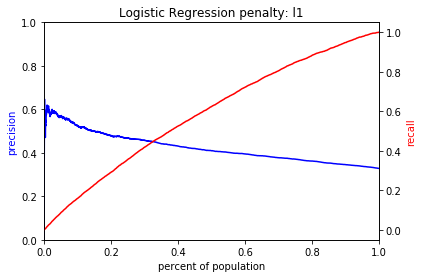

----------

Logistic Regression penalty: l2
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.02:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.05:

True negatives: 2.00
False positives: 8962.00
False negatives: 2.00
True positives: 4380.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.1:

True negatives: 20.00
False positives: 8944.00
False negatives: 5.00
True positives: 4377.00

    accuracy 0.33
    precision 0.33
    recall 1

<Figure size 432x288 with 0 Axes>

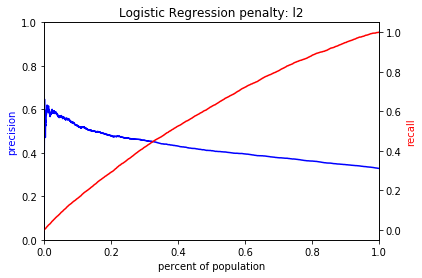

----------

Logistic Regression C: 0.001
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.02:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.05:

True negatives: 2.00
False positives: 8962.00
False negatives: 2.00
True positives: 4380.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.1:

True negatives: 20.00
False positives: 8944.00
False negatives: 5.00
True positives: 4377.00

    accuracy 0.33
    precision 0.33
    recall 1.00

<Figure size 432x288 with 0 Axes>

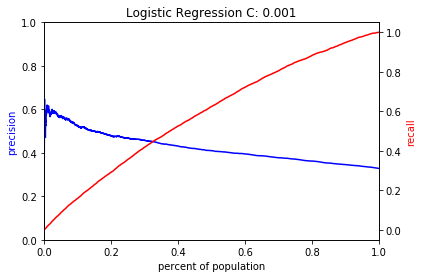

----------

Logistic Regression C: 0.1
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.02:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.05:

True negatives: 2.00
False positives: 8962.00
False negatives: 2.00
True positives: 4380.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.1:

True negatives: 20.00
False positives: 8944.00
False negatives: 5.00
True positives: 4377.00

    accuracy 0.33
    precision 0.33
    recall 1.00
 

<Figure size 432x288 with 0 Axes>

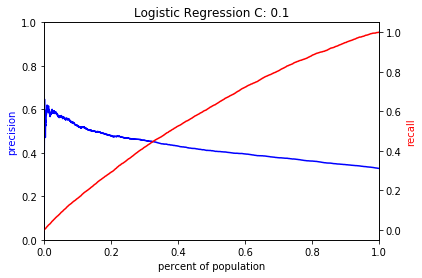

----------

Logistic Regression C: 1
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.02:

True negatives: 0.00
False positives: 8964.00
False negatives: 0.00
True positives: 4382.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.05:

True negatives: 2.00
False positives: 8962.00
False negatives: 2.00
True positives: 4380.00

    accuracy 0.33
    precision 0.33
    recall 1.00
    f1 0.49

At threshold 0.1:

True negatives: 20.00
False positives: 8944.00
False negatives: 5.00
True positives: 4377.00

    accuracy 0.33
    precision 0.33
    recall 1.00
   

<Figure size 432x288 with 0 Axes>

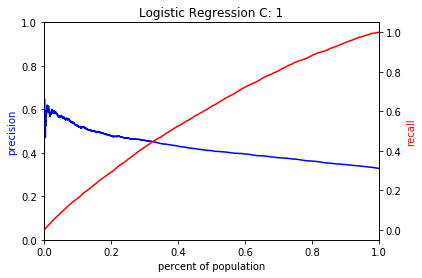

----------

SVM penalty: l2
{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 0, 'tol': 0.0001, 'verbose': 0}

At threshold 0.01:

True negatives: 8591.00
False positives: 373.00
False negatives: 4168.00
True positives: 214.00

    accuracy 0.66
    precision 0.36
    recall 0.05
    f1 0.09

At threshold 0.02:

True negatives: 8598.00
False positives: 366.00
False negatives: 4173.00
True positives: 209.00

    accuracy 0.66
    precision 0.36
    recall 0.05
    f1 0.08

At threshold 0.05:

True negatives: 8622.00
False positives: 342.00
False negatives: 4183.00
True positives: 199.00

    accuracy 0.66
    precision 0.37
    recall 0.05
    f1 0.08

At threshold 0.1:

True negatives: 8646.00
False positives: 318.00
False negatives: 4197.00
True positives: 185.00

    accuracy 0.66
    precision 0.37
    recall 0.04
    f1 0.08

At threshold 0.2

<Figure size 432x288 with 0 Axes>

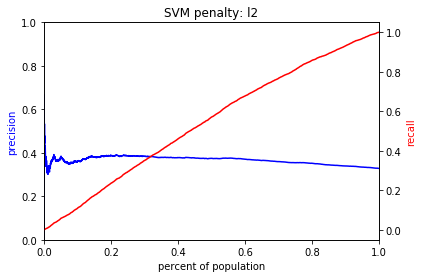

----------

Decision Tree criterion: gini
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 233.00
False positives: 8731.00
False negatives: 38.00
True positives: 4344.00

    accuracy 0.34
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.02:

True negatives: 277.00
False positives: 8687.00
False negatives: 41.00
True positives: 4341.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.05:

True negatives: 356.00
False positives: 8608.00
False negatives: 51.00
True positives: 4331.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.1:

True negatives: 748.00
False positives: 8216.00
False negatives: 116.00
True posit

<Figure size 432x288 with 0 Axes>

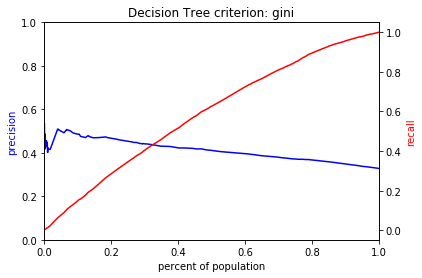

----------

Decision Tree criterion: entropy
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 233.00
False positives: 8731.00
False negatives: 38.00
True positives: 4344.00

    accuracy 0.34
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.02:

True negatives: 277.00
False positives: 8687.00
False negatives: 41.00
True positives: 4341.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.05:

True negatives: 356.00
False positives: 8608.00
False negatives: 51.00
True positives: 4331.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.1:

True negatives: 748.00
False positives: 8216.00
False negatives: 116.00
True po

<Figure size 432x288 with 0 Axes>

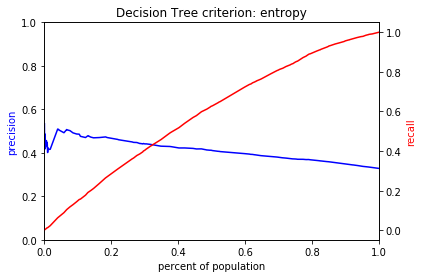

----------

Decision Tree max_depth: 1
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 233.00
False positives: 8731.00
False negatives: 38.00
True positives: 4344.00

    accuracy 0.34
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.02:

True negatives: 277.00
False positives: 8687.00
False negatives: 41.00
True positives: 4341.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.05:

True negatives: 356.00
False positives: 8608.00
False negatives: 51.00
True positives: 4331.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.1:

True negatives: 748.00
False positives: 8216.00
False negatives: 116.00
True positive

<Figure size 432x288 with 0 Axes>

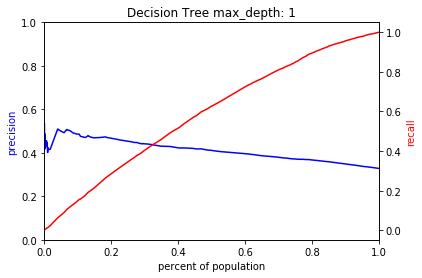

----------

Decision Tree max_depth: 5
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 233.00
False positives: 8731.00
False negatives: 38.00
True positives: 4344.00

    accuracy 0.34
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.02:

True negatives: 277.00
False positives: 8687.00
False negatives: 41.00
True positives: 4341.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.05:

True negatives: 356.00
False positives: 8608.00
False negatives: 51.00
True positives: 4331.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.1:

True negatives: 748.00
False positives: 8216.00
False negatives: 116.00
True positive

<Figure size 432x288 with 0 Axes>

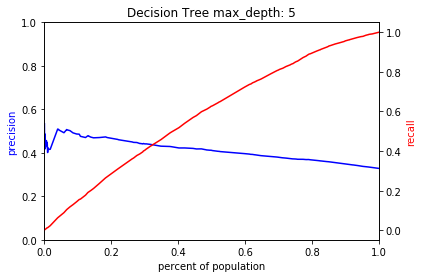

----------

Decision Tree max_depth: 10
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 233.00
False positives: 8731.00
False negatives: 38.00
True positives: 4344.00

    accuracy 0.34
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.02:

True negatives: 277.00
False positives: 8687.00
False negatives: 41.00
True positives: 4341.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.05:

True negatives: 356.00
False positives: 8608.00
False negatives: 51.00
True positives: 4331.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.1:

True negatives: 748.00
False positives: 8216.00
False negatives: 116.00
True positiv

<Figure size 432x288 with 0 Axes>

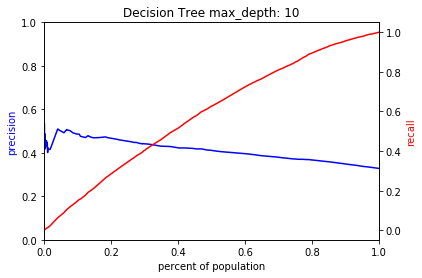

----------

Decision Tree max_features: None
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 233.00
False positives: 8731.00
False negatives: 38.00
True positives: 4344.00

    accuracy 0.34
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.02:

True negatives: 277.00
False positives: 8687.00
False negatives: 41.00
True positives: 4341.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.05:

True negatives: 356.00
False positives: 8608.00
False negatives: 51.00
True positives: 4331.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.1:

True negatives: 748.00
False positives: 8216.00
False negatives: 116.00
True po

<Figure size 432x288 with 0 Axes>

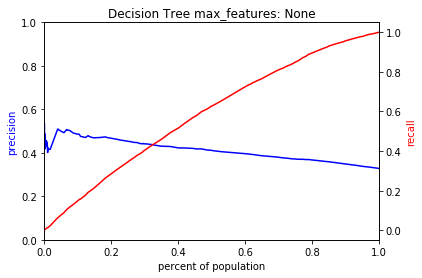

----------

Decision Tree max_features: sqrt
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 233.00
False positives: 8731.00
False negatives: 38.00
True positives: 4344.00

    accuracy 0.34
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.02:

True negatives: 277.00
False positives: 8687.00
False negatives: 41.00
True positives: 4341.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.05:

True negatives: 356.00
False positives: 8608.00
False negatives: 51.00
True positives: 4331.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.1:

True negatives: 748.00
False positives: 8216.00
False negatives: 116.00
True po

<Figure size 432x288 with 0 Axes>

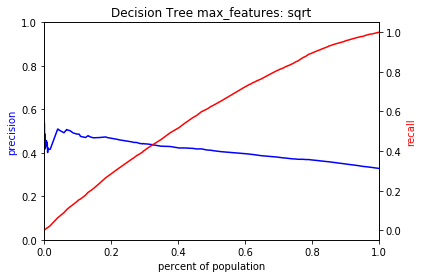

----------

Decision Tree max_features: log2
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 233.00
False positives: 8731.00
False negatives: 38.00
True positives: 4344.00

    accuracy 0.34
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.02:

True negatives: 277.00
False positives: 8687.00
False negatives: 41.00
True positives: 4341.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.05:

True negatives: 356.00
False positives: 8608.00
False negatives: 51.00
True positives: 4331.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.1:

True negatives: 748.00
False positives: 8216.00
False negatives: 116.00
True po

<Figure size 432x288 with 0 Axes>

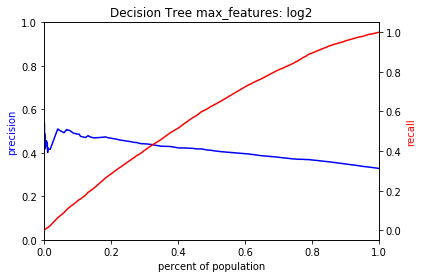

----------

Decision Tree min_samples_split: 2
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 233.00
False positives: 8731.00
False negatives: 38.00
True positives: 4344.00

    accuracy 0.34
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.02:

True negatives: 277.00
False positives: 8687.00
False negatives: 41.00
True positives: 4341.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.05:

True negatives: 356.00
False positives: 8608.00
False negatives: 51.00
True positives: 4331.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.1:

True negatives: 748.00
False positives: 8216.00
False negatives: 116.00
True 

<Figure size 432x288 with 0 Axes>

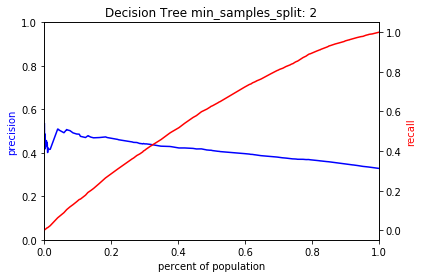

----------

Decision Tree min_samples_split: 5
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 233.00
False positives: 8731.00
False negatives: 38.00
True positives: 4344.00

    accuracy 0.34
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.02:

True negatives: 277.00
False positives: 8687.00
False negatives: 41.00
True positives: 4341.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.05:

True negatives: 356.00
False positives: 8608.00
False negatives: 51.00
True positives: 4331.00

    accuracy 0.35
    precision 0.33
    recall 0.99
    f1 0.50

At threshold 0.1:

True negatives: 748.00
False positives: 8216.00
False negatives: 116.00
True 

<Figure size 432x288 with 0 Axes>

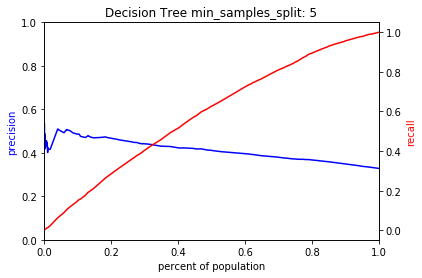

----------

KNN n_neighbors: 1
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 1052.00
False positives: 7912.00
False negatives: 202.00
True positives: 4180.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.02:

True negatives: 1053.00
False positives: 7911.00
False negatives: 203.00
True positives: 4179.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.05:

True negatives: 1069.00
False positives: 7895.00
False negatives: 211.00
True positives: 4171.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.1:

True negatives: 2113.00
False positives: 6851.00
False negatives: 538.00
True positives: 3844.00

    accuracy 0.45
    precision 0.36
    recall 0.88
    f1 0.51

At threshold 0.2:

True negatives: 3876.00
False positives: 5088.00
False negat

<Figure size 432x288 with 0 Axes>

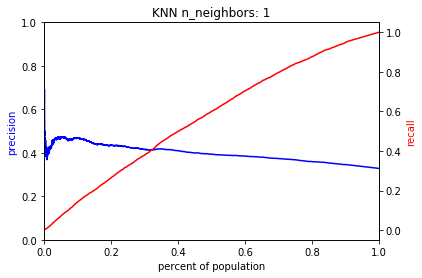

----------

KNN n_neighbors: 5
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 1052.00
False positives: 7912.00
False negatives: 202.00
True positives: 4180.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.02:

True negatives: 1053.00
False positives: 7911.00
False negatives: 203.00
True positives: 4179.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.05:

True negatives: 1069.00
False positives: 7895.00
False negatives: 211.00
True positives: 4171.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.1:

True negatives: 2113.00
False positives: 6851.00
False negatives: 538.00
True positives: 3844.00

    accuracy 0.45
    precision 0.36
    recall 0.88
    f1 0.51

At threshold 0.2:

True negatives: 3876.00
False positives: 5088.00
False negat

<Figure size 432x288 with 0 Axes>

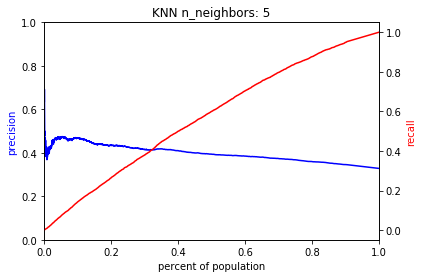

----------

KNN n_neighbors: 10
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 1052.00
False positives: 7912.00
False negatives: 202.00
True positives: 4180.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.02:

True negatives: 1053.00
False positives: 7911.00
False negatives: 203.00
True positives: 4179.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.05:

True negatives: 1069.00
False positives: 7895.00
False negatives: 211.00
True positives: 4171.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.1:

True negatives: 2113.00
False positives: 6851.00
False negatives: 538.00
True positives: 3844.00

    accuracy 0.45
    precision 0.36
    recall 0.88
    f1 0.51

At threshold 0.2:

True negatives: 3876.00
False positives: 5088.00
False nega

<Figure size 432x288 with 0 Axes>

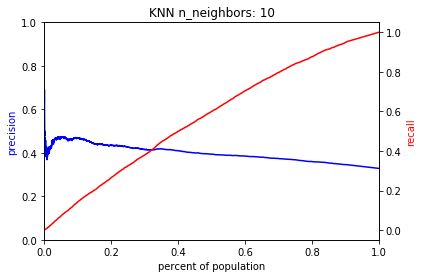

----------

KNN weights: uniform
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 1052.00
False positives: 7912.00
False negatives: 202.00
True positives: 4180.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.02:

True negatives: 1053.00
False positives: 7911.00
False negatives: 203.00
True positives: 4179.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.05:

True negatives: 1069.00
False positives: 7895.00
False negatives: 211.00
True positives: 4171.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.1:

True negatives: 2113.00
False positives: 6851.00
False negatives: 538.00
True positives: 3844.00

    accuracy 0.45
    precision 0.36
    recall 0.88
    f1 0.51

At threshold 0.2:

True negatives: 3876.00
False positives: 5088.00
False neg

<Figure size 432x288 with 0 Axes>

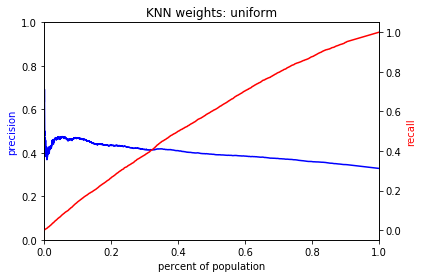

----------

KNN weights: distance
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 1052.00
False positives: 7912.00
False negatives: 202.00
True positives: 4180.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.02:

True negatives: 1053.00
False positives: 7911.00
False negatives: 203.00
True positives: 4179.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.05:

True negatives: 1069.00
False positives: 7895.00
False negatives: 211.00
True positives: 4171.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.1:

True negatives: 2113.00
False positives: 6851.00
False negatives: 538.00
True positives: 3844.00

    accuracy 0.45
    precision 0.36
    recall 0.88
    f1 0.51

At threshold 0.2:

True negatives: 3876.00
False positives: 5088.00
False ne

<Figure size 432x288 with 0 Axes>

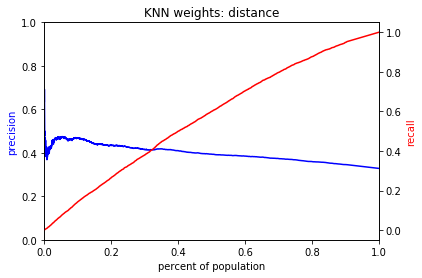

----------

KNN algorithm: auto
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 1052.00
False positives: 7912.00
False negatives: 202.00
True positives: 4180.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.02:

True negatives: 1053.00
False positives: 7911.00
False negatives: 203.00
True positives: 4179.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.05:

True negatives: 1069.00
False positives: 7895.00
False negatives: 211.00
True positives: 4171.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.1:

True negatives: 2113.00
False positives: 6851.00
False negatives: 538.00
True positives: 3844.00

    accuracy 0.45
    precision 0.36
    recall 0.88
    f1 0.51

At threshold 0.2:

True negatives: 3876.00
False positives: 5088.00
False nega

<Figure size 432x288 with 0 Axes>

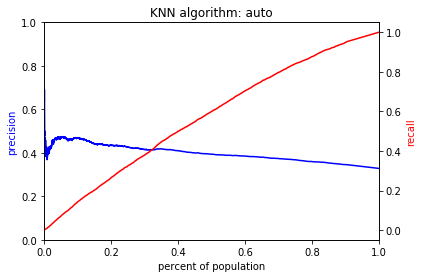

----------

KNN algorithm: ball_tree
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 1052.00
False positives: 7912.00
False negatives: 202.00
True positives: 4180.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.02:

True negatives: 1053.00
False positives: 7911.00
False negatives: 203.00
True positives: 4179.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.05:

True negatives: 1069.00
False positives: 7895.00
False negatives: 211.00
True positives: 4171.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.1:

True negatives: 2113.00
False positives: 6851.00
False negatives: 538.00
True positives: 3844.00

    accuracy 0.45
    precision 0.36
    recall 0.88
    f1 0.51

At threshold 0.2:

True negatives: 3876.00
False positives: 5088.00
False

<Figure size 432x288 with 0 Axes>

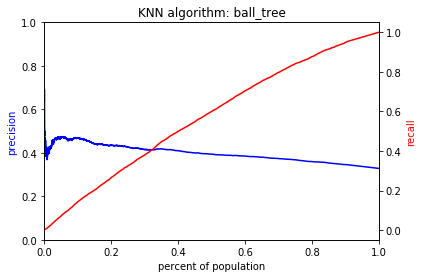

----------

KNN algorithm: kd_tree
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 1052.00
False positives: 7912.00
False negatives: 202.00
True positives: 4180.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.02:

True negatives: 1053.00
False positives: 7911.00
False negatives: 203.00
True positives: 4179.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.05:

True negatives: 1069.00
False positives: 7895.00
False negatives: 211.00
True positives: 4171.00

    accuracy 0.39
    precision 0.35
    recall 0.95
    f1 0.51

At threshold 0.1:

True negatives: 2113.00
False positives: 6851.00
False negatives: 538.00
True positives: 3844.00

    accuracy 0.45
    precision 0.36
    recall 0.88
    f1 0.51

At threshold 0.2:

True negatives: 3876.00
False positives: 5088.00
False n

<Figure size 432x288 with 0 Axes>

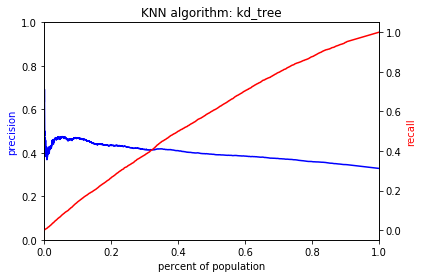

----------

Training and test set 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Random Forest n_estimators: 10
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.02:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.05:

True negatives: 16.00
False positives: 23470.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.1:

True negatives: 724.00
False p

<Figure size 432x288 with 0 Axes>

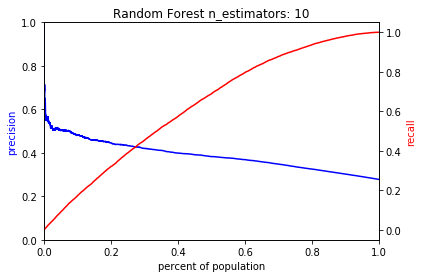

----------

Random Forest n_estimators: 20
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.02:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.05:

True negatives: 16.00
False positives: 23470.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.1:

True negatives: 72

<Figure size 432x288 with 0 Axes>

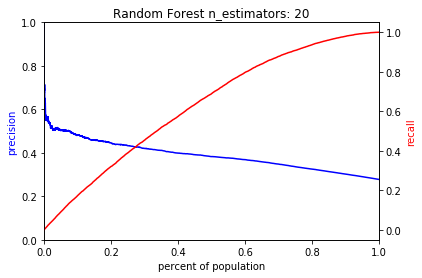

----------

Random Forest max_depth: 5
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.02:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.05:

True negatives: 16.00
False positives: 23470.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.1:

True negatives: 724.00

<Figure size 432x288 with 0 Axes>

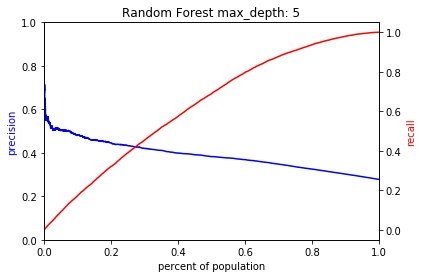

----------

Random Forest max_depth: 10
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.02:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.05:

True negatives: 16.00
False positives: 23470.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.1:

True negatives: 724.0

<Figure size 432x288 with 0 Axes>

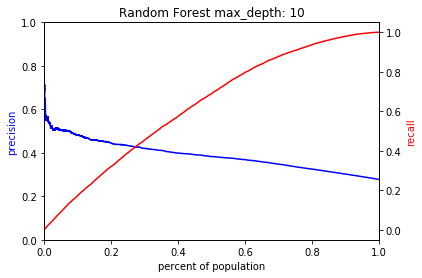

----------

Random Forest max_features: sqrt
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.02:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.05:

True negatives: 16.00
False positives: 23470.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.1:

True negatives: 

<Figure size 432x288 with 0 Axes>

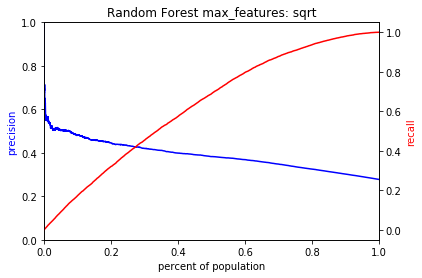

----------

Random Forest max_features: log2
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.02:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.05:

True negatives: 16.00
False positives: 23470.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.1:

True negatives: 

<Figure size 432x288 with 0 Axes>

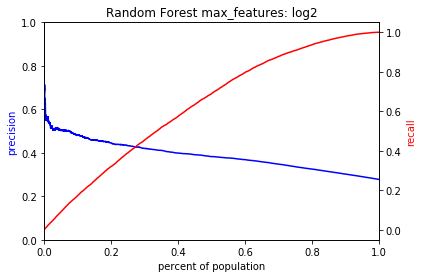

----------

Random Forest min_samples_split: 2
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.02:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.05:

True negatives: 16.00
False positives: 23470.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.1:

True negatives

<Figure size 432x288 with 0 Axes>

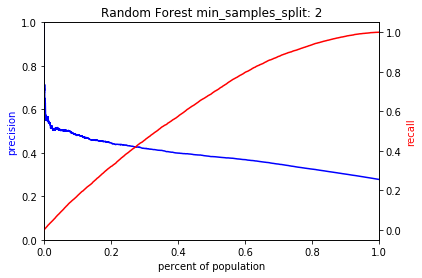

----------

Random Forest min_samples_split: 10
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.02:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.05:

True negatives: 16.00
False positives: 23470.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.1:

True negative

<Figure size 432x288 with 0 Axes>

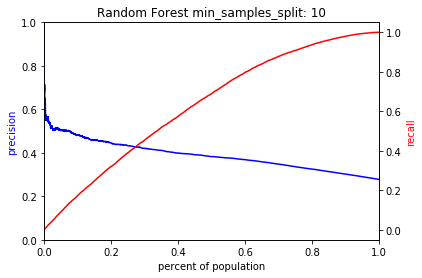

----------

Random Forest n_jobs: -1
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.02:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.05:

True negatives: 16.00
False positives: 23470.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.1:

True negatives: 724.00
F

<Figure size 432x288 with 0 Axes>

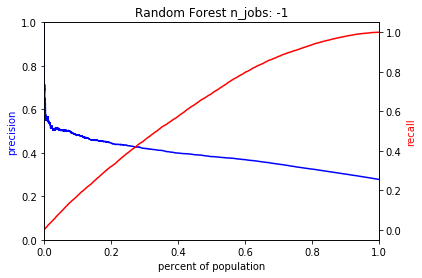

----------

Ada Boost algorithm: SAMME
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 10, 'random_state': N

<Figure size 432x288 with 0 Axes>

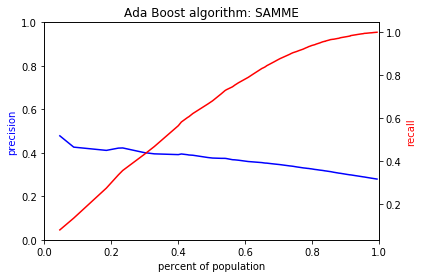

----------

Ada Boost algorithm: SAMME.R
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 10, 'random_state':

<Figure size 432x288 with 0 Axes>

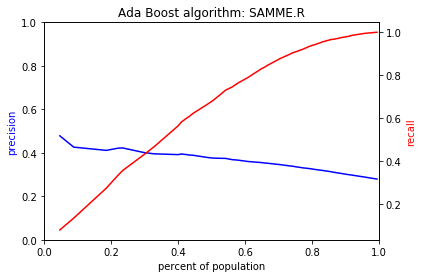

----------

Ada Boost n_estimators: 1
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 10, 'random_state': No

<Figure size 432x288 with 0 Axes>

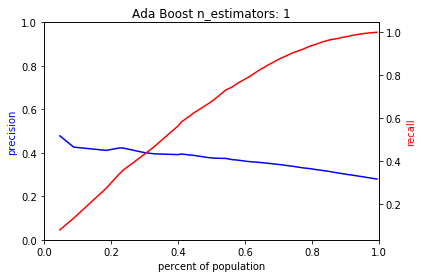

----------

Ada Boost n_estimators: 10
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 10, 'random_state': N

<Figure size 432x288 with 0 Axes>

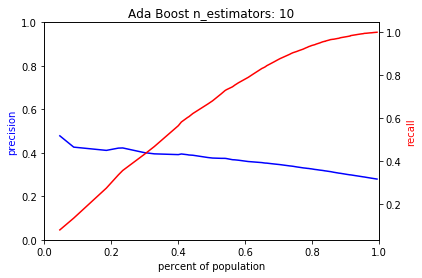

----------

Logistic Regression penalty: l1
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.02:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.05:

True negatives: 53.00
False positives: 23433.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.44

At threshold 0.1:

True negatives: 78.00
False positives: 23408.00
False negatives: 4.00
True positives: 9028.00

    accuracy 0.28
    precision 0.28
    rec

<Figure size 432x288 with 0 Axes>

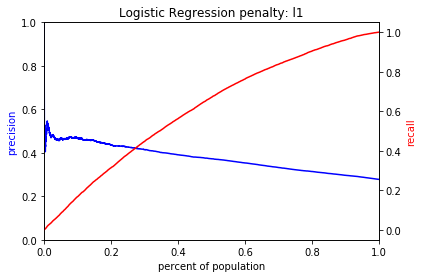

----------

Logistic Regression penalty: l2
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.02:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.05:

True negatives: 53.00
False positives: 23433.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.44

At threshold 0.1:

True negatives: 78.00
False positives: 23408.00
False negatives: 4.00
True positives: 9028.00

    accuracy 0.28
    precision 0.28
    rec

<Figure size 432x288 with 0 Axes>

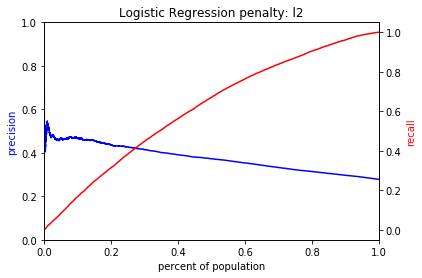

----------

Logistic Regression C: 0.001
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.02:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.05:

True negatives: 53.00
False positives: 23433.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.44

At threshold 0.1:

True negatives: 78.00
False positives: 23408.00
False negatives: 4.00
True positives: 9028.00

    accuracy 0.28
    precision 0.28
    recall

<Figure size 432x288 with 0 Axes>

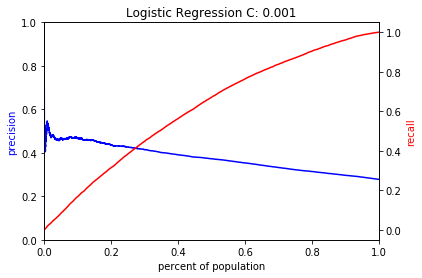

----------

Logistic Regression C: 0.1
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.02:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.05:

True negatives: 53.00
False positives: 23433.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.44

At threshold 0.1:

True negatives: 78.00
False positives: 23408.00
False negatives: 4.00
True positives: 9028.00

    accuracy 0.28
    precision 0.28
    recall 1

<Figure size 432x288 with 0 Axes>

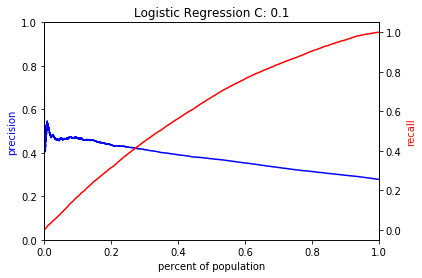

----------

Logistic Regression C: 1
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.01:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.02:

True negatives: 0.00
False positives: 23486.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.43

At threshold 0.05:

True negatives: 53.00
False positives: 23433.00
False negatives: 0.00
True positives: 9032.00

    accuracy 0.28
    precision 0.28
    recall 1.00
    f1 0.44

At threshold 0.1:

True negatives: 78.00
False positives: 23408.00
False negatives: 4.00
True positives: 9028.00

    accuracy 0.28
    precision 0.28
    recall 1.0

<Figure size 432x288 with 0 Axes>

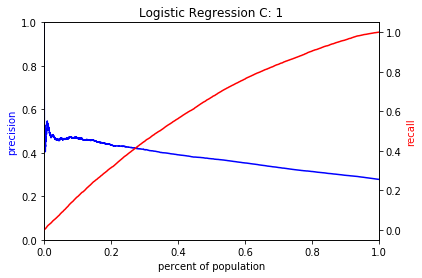

----------

SVM penalty: l2
{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 0, 'tol': 0.0001, 'verbose': 0}

At threshold 0.01:

True negatives: 23486.00
False positives: 0.00
False negatives: 9032.00
True positives: 0.00

    accuracy 0.72
    precision nan
    recall 0.00


C:\Users\Krista CHAN!\Documents\GitHub\mlforpublicpolicy\Homework 2, 3\preprocessing_hw3.py:195: RuntimeWarning: invalid value encountered in double_scalars
  _, false_positive, _, true_positives = \


    f1 nan

At threshold 0.02:

True negatives: 23486.00
False positives: 0.00
False negatives: 9032.00
True positives: 0.00

    accuracy 0.72
    precision nan
    recall 0.00
    f1 nan

At threshold 0.05:

True negatives: 23486.00
False positives: 0.00
False negatives: 9032.00
True positives: 0.00

    accuracy 0.72
    precision nan
    recall 0.00
    f1 nan

At threshold 0.1:

True negatives: 23486.00
False positives: 0.00
False negatives: 9032.00
True positives: 0.00

    accuracy 0.72
    precision nan
    recall 0.00
    f1 nan

At threshold 0.2:

True negatives: 23486.00
False positives: 0.00
False negatives: 9032.00
True positives: 0.00

    accuracy 0.72
    precision nan
    recall 0.00
    f1 nan

At threshold 0.3:

True negatives: 23486.00
False positives: 0.00
False negatives: 9032.00
True positives: 0.00

    accuracy 0.72
    precision nan
    recall 0.00
    f1 nan

At threshold 0.5:

True negatives: 23486.00
False positives: 0.00
False negatives: 9032.00
True posit

<Figure size 432x288 with 0 Axes>

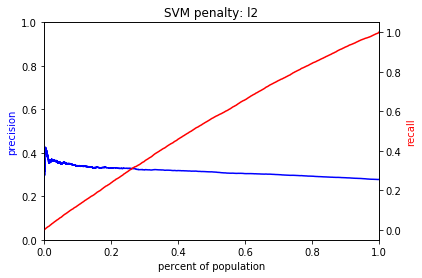

----------

Decision Tree criterion: gini
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 530.00
False positives: 22956.00
False negatives: 72.00
True positives: 8960.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.02:

True negatives: 573.00
False positives: 22913.00
False negatives: 76.00
True positives: 8956.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.05:

True negatives: 1138.00
False positives: 22348.00
False negatives: 105.00
True positives: 8927.00

    accuracy 0.31
    precision 0.29
    recall 0.99
    f1 0.44

At threshold 0.1:

True negatives: 2491.00
False positives: 20995.00
False negatives: 216.00
Tru

<Figure size 432x288 with 0 Axes>

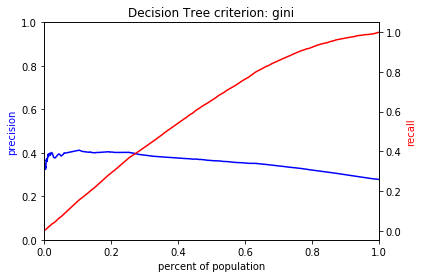

----------

Decision Tree criterion: entropy
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 530.00
False positives: 22956.00
False negatives: 72.00
True positives: 8960.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.02:

True negatives: 573.00
False positives: 22913.00
False negatives: 76.00
True positives: 8956.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.05:

True negatives: 1138.00
False positives: 22348.00
False negatives: 105.00
True positives: 8927.00

    accuracy 0.31
    precision 0.29
    recall 0.99
    f1 0.44

At threshold 0.1:

True negatives: 2491.00
False positives: 20995.00
False negatives: 216.00


<Figure size 432x288 with 0 Axes>

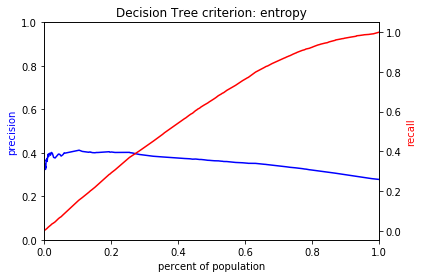

----------

Decision Tree max_depth: 1
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 530.00
False positives: 22956.00
False negatives: 72.00
True positives: 8960.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.02:

True negatives: 573.00
False positives: 22913.00
False negatives: 76.00
True positives: 8956.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.05:

True negatives: 1138.00
False positives: 22348.00
False negatives: 105.00
True positives: 8927.00

    accuracy 0.31
    precision 0.29
    recall 0.99
    f1 0.44

At threshold 0.1:

True negatives: 2491.00
False positives: 20995.00
False negatives: 216.00
True p

<Figure size 432x288 with 0 Axes>

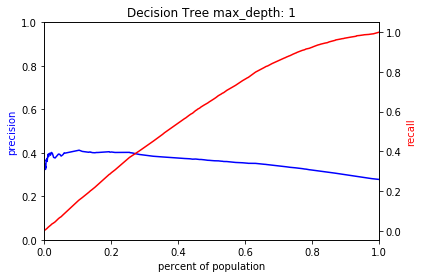

----------

Decision Tree max_depth: 5
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 530.00
False positives: 22956.00
False negatives: 72.00
True positives: 8960.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.02:

True negatives: 573.00
False positives: 22913.00
False negatives: 76.00
True positives: 8956.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.05:

True negatives: 1138.00
False positives: 22348.00
False negatives: 105.00
True positives: 8927.00

    accuracy 0.31
    precision 0.29
    recall 0.99
    f1 0.44

At threshold 0.1:

True negatives: 2491.00
False positives: 20995.00
False negatives: 216.00
True p

<Figure size 432x288 with 0 Axes>

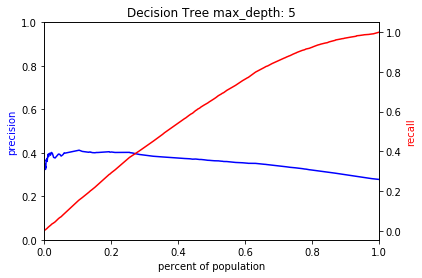

----------

Decision Tree max_depth: 10
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 530.00
False positives: 22956.00
False negatives: 72.00
True positives: 8960.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.02:

True negatives: 573.00
False positives: 22913.00
False negatives: 76.00
True positives: 8956.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.05:

True negatives: 1138.00
False positives: 22348.00
False negatives: 105.00
True positives: 8927.00

    accuracy 0.31
    precision 0.29
    recall 0.99
    f1 0.44

At threshold 0.1:

True negatives: 2491.00
False positives: 20995.00
False negatives: 216.00
True 

<Figure size 432x288 with 0 Axes>

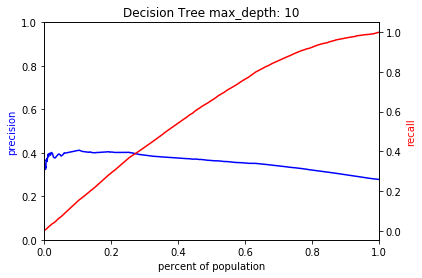

----------

Decision Tree max_features: None
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 530.00
False positives: 22956.00
False negatives: 72.00
True positives: 8960.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.02:

True negatives: 573.00
False positives: 22913.00
False negatives: 76.00
True positives: 8956.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.05:

True negatives: 1138.00
False positives: 22348.00
False negatives: 105.00
True positives: 8927.00

    accuracy 0.31
    precision 0.29
    recall 0.99
    f1 0.44

At threshold 0.1:

True negatives: 2491.00
False positives: 20995.00
False negatives: 216.00


<Figure size 432x288 with 0 Axes>

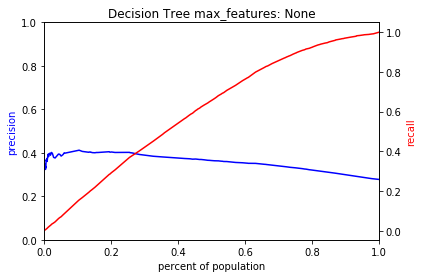

----------

Decision Tree max_features: sqrt
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 530.00
False positives: 22956.00
False negatives: 72.00
True positives: 8960.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.02:

True negatives: 573.00
False positives: 22913.00
False negatives: 76.00
True positives: 8956.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.05:

True negatives: 1138.00
False positives: 22348.00
False negatives: 105.00
True positives: 8927.00

    accuracy 0.31
    precision 0.29
    recall 0.99
    f1 0.44

At threshold 0.1:

True negatives: 2491.00
False positives: 20995.00
False negatives: 216.00


<Figure size 432x288 with 0 Axes>

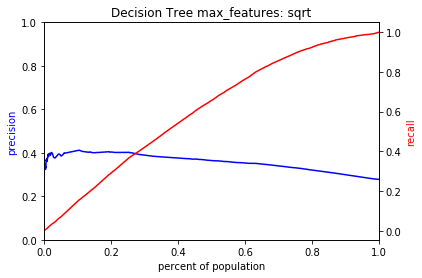

----------

Decision Tree max_features: log2
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 530.00
False positives: 22956.00
False negatives: 72.00
True positives: 8960.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.02:

True negatives: 573.00
False positives: 22913.00
False negatives: 76.00
True positives: 8956.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.05:

True negatives: 1138.00
False positives: 22348.00
False negatives: 105.00
True positives: 8927.00

    accuracy 0.31
    precision 0.29
    recall 0.99
    f1 0.44

At threshold 0.1:

True negatives: 2491.00
False positives: 20995.00
False negatives: 216.00


<Figure size 432x288 with 0 Axes>

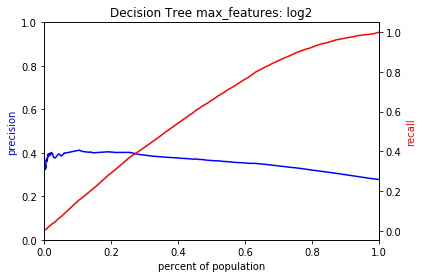

----------

Decision Tree min_samples_split: 2
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 530.00
False positives: 22956.00
False negatives: 72.00
True positives: 8960.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.02:

True negatives: 573.00
False positives: 22913.00
False negatives: 76.00
True positives: 8956.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.05:

True negatives: 1138.00
False positives: 22348.00
False negatives: 105.00
True positives: 8927.00

    accuracy 0.31
    precision 0.29
    recall 0.99
    f1 0.44

At threshold 0.1:

True negatives: 2491.00
False positives: 20995.00
False negatives: 216.0

<Figure size 432x288 with 0 Axes>

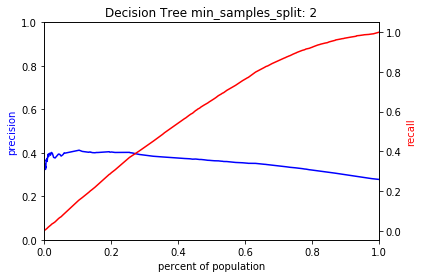

----------

Decision Tree min_samples_split: 5
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.01:

True negatives: 530.00
False positives: 22956.00
False negatives: 72.00
True positives: 8960.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.02:

True negatives: 573.00
False positives: 22913.00
False negatives: 76.00
True positives: 8956.00

    accuracy 0.29
    precision 0.28
    recall 0.99
    f1 0.44

At threshold 0.05:

True negatives: 1138.00
False positives: 22348.00
False negatives: 105.00
True positives: 8927.00

    accuracy 0.31
    precision 0.29
    recall 0.99
    f1 0.44

At threshold 0.1:

True negatives: 2491.00
False positives: 20995.00
False negatives: 216.0

<Figure size 432x288 with 0 Axes>

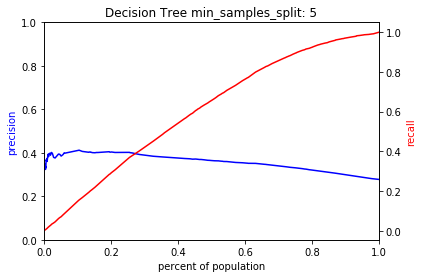

----------

KNN n_neighbors: 1
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 2054.00
False positives: 21432.00
False negatives: 260.00
True positives: 8772.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.02:

True negatives: 2056.00
False positives: 21430.00
False negatives: 261.00
True positives: 8771.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.05:

True negatives: 2091.00
False positives: 21395.00
False negatives: 271.00
True positives: 8761.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.1:

True negatives: 4396.00
False positives: 19090.00
False negatives: 751.00
True positives: 8281.00

    accuracy 0.39
    precision 0.30
    recall 0.92
    f1 0.45

At threshold 0.2:

True negatives: 8222.00
False positives: 15264.00
False 

<Figure size 432x288 with 0 Axes>

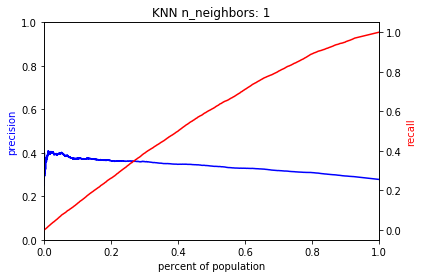

----------

KNN n_neighbors: 5
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 2054.00
False positives: 21432.00
False negatives: 260.00
True positives: 8772.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.02:

True negatives: 2056.00
False positives: 21430.00
False negatives: 261.00
True positives: 8771.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.05:

True negatives: 2091.00
False positives: 21395.00
False negatives: 271.00
True positives: 8761.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.1:

True negatives: 4396.00
False positives: 19090.00
False negatives: 751.00
True positives: 8281.00

    accuracy 0.39
    precision 0.30
    recall 0.92
    f1 0.45

At threshold 0.2:

True negatives: 8222.00
False positives: 15264.00
False 

<Figure size 432x288 with 0 Axes>

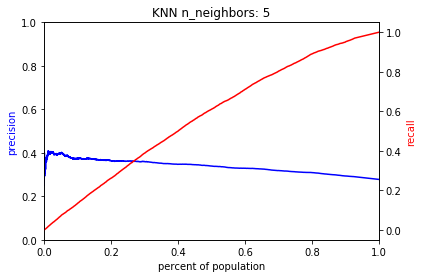

----------

KNN n_neighbors: 10
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 2054.00
False positives: 21432.00
False negatives: 260.00
True positives: 8772.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.02:

True negatives: 2056.00
False positives: 21430.00
False negatives: 261.00
True positives: 8771.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.05:

True negatives: 2091.00
False positives: 21395.00
False negatives: 271.00
True positives: 8761.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.1:

True negatives: 4396.00
False positives: 19090.00
False negatives: 751.00
True positives: 8281.00

    accuracy 0.39
    precision 0.30
    recall 0.92
    f1 0.45

At threshold 0.2:

True negatives: 8222.00
False positives: 15264.00
False

<Figure size 432x288 with 0 Axes>

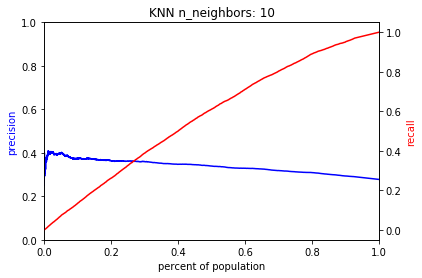

----------

KNN weights: uniform
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 2054.00
False positives: 21432.00
False negatives: 260.00
True positives: 8772.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.02:

True negatives: 2056.00
False positives: 21430.00
False negatives: 261.00
True positives: 8771.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.05:

True negatives: 2091.00
False positives: 21395.00
False negatives: 271.00
True positives: 8761.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.1:

True negatives: 4396.00
False positives: 19090.00
False negatives: 751.00
True positives: 8281.00

    accuracy 0.39
    precision 0.30
    recall 0.92
    f1 0.45

At threshold 0.2:

True negatives: 8222.00
False positives: 15264.00
Fals

<Figure size 432x288 with 0 Axes>

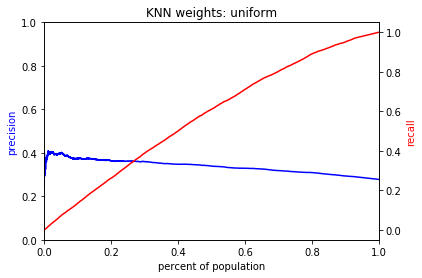

----------

KNN weights: distance
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 2054.00
False positives: 21432.00
False negatives: 260.00
True positives: 8772.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.02:

True negatives: 2056.00
False positives: 21430.00
False negatives: 261.00
True positives: 8771.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.05:

True negatives: 2091.00
False positives: 21395.00
False negatives: 271.00
True positives: 8761.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.1:

True negatives: 4396.00
False positives: 19090.00
False negatives: 751.00
True positives: 8281.00

    accuracy 0.39
    precision 0.30
    recall 0.92
    f1 0.45

At threshold 0.2:

True negatives: 8222.00
False positives: 15264.00
Fal

<Figure size 432x288 with 0 Axes>

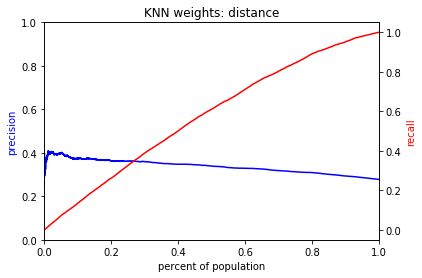

----------

KNN algorithm: auto
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 2054.00
False positives: 21432.00
False negatives: 260.00
True positives: 8772.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.02:

True negatives: 2056.00
False positives: 21430.00
False negatives: 261.00
True positives: 8771.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.05:

True negatives: 2091.00
False positives: 21395.00
False negatives: 271.00
True positives: 8761.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.1:

True negatives: 4396.00
False positives: 19090.00
False negatives: 751.00
True positives: 8281.00

    accuracy 0.39
    precision 0.30
    recall 0.92
    f1 0.45

At threshold 0.2:

True negatives: 8222.00
False positives: 15264.00
False

<Figure size 432x288 with 0 Axes>

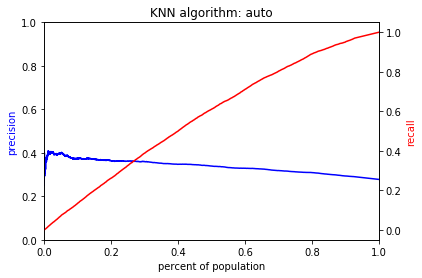

----------

KNN algorithm: ball_tree
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 2054.00
False positives: 21432.00
False negatives: 260.00
True positives: 8772.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.02:

True negatives: 2056.00
False positives: 21430.00
False negatives: 261.00
True positives: 8771.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.05:

True negatives: 2091.00
False positives: 21395.00
False negatives: 271.00
True positives: 8761.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.1:

True negatives: 4396.00
False positives: 19090.00
False negatives: 751.00
True positives: 8281.00

    accuracy 0.39
    precision 0.30
    recall 0.92
    f1 0.45

At threshold 0.2:

True negatives: 8222.00
False positives: 15264.00


<Figure size 432x288 with 0 Axes>

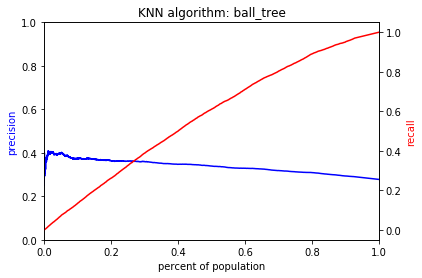

----------

KNN algorithm: kd_tree
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.01:

True negatives: 2054.00
False positives: 21432.00
False negatives: 260.00
True positives: 8772.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.02:

True negatives: 2056.00
False positives: 21430.00
False negatives: 261.00
True positives: 8771.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.05:

True negatives: 2091.00
False positives: 21395.00
False negatives: 271.00
True positives: 8761.00

    accuracy 0.33
    precision 0.29
    recall 0.97
    f1 0.45

At threshold 0.1:

True negatives: 4396.00
False positives: 19090.00
False negatives: 751.00
True positives: 8281.00

    accuracy 0.39
    precision 0.30
    recall 0.92
    f1 0.45

At threshold 0.2:

True negatives: 8222.00
False positives: 15264.00
Fa

<Figure size 432x288 with 0 Axes>

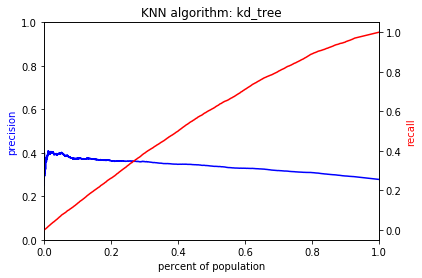

----------



In [80]:
pp.eval_test_sets(train_test_sets, features, [.01, .02, .05, .1, .2, .3, .5], loop_params=True)

Above, I have returned evaluation metrics for various models using three different training and test sets. We can compare these models to help us inform interventions for elevating the projects which DonorsChoose.org can intervene on. For example, suppose DonorsChoose.org would like to boost the visibility of certain projects in order to increase their chances of being fully funded within 60 days by creating a featured page which highlights those projects. However, there is only enough space on the page to accommodate about 5% of all projects. These models can help us select those 5% of projects which are least likely to be funded within 60 days so DonorsChoose.org can feature them.

If we are able to intervene on only 5% of projects, we would want to maximize the number of projects we select which are truly at risk of not being fully funded within 60 days. In order to use our models, we will need to select a threshold score which we deem to be high enough to "predict" a project to be positively at risk for not being fully funded within 60 days.

In [81]:
print(train_test_sets[2][1].shape)
print(train_test_sets[2][1].over_60.sum())
print(train_test_sets[2][1].over_60.mean())

(32518, 52)
9032
0.27775385940094716


In our final test set which spans the most recent dates posted (July 2013-Dec 2013), there were 32,518 projects, of which 9,032 or about 27.8% did not get fully funded within 60 days. If DonorsChoose.org were to intervene on projects in July 2013, they would want to select about 1626 (5%) projects to be featured on their page. Below are the score thresholds for each model which would account for 5% of projects in the final test set.

In [82]:
fitted_clfs = pp.fit_clfs(train_test_sets[2], features, param_loop=True)
cutoffs = pp.threshold_cutoff(train_test_sets[2], features, fitted_clfs, 0.05)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [83]:
cutoffs

{'Random Forest n_estimators: 10': 0.461515194741576,
 'Random Forest n_estimators: 20': 0.4615151947415761,
 'Random Forest max_depth: 5': 0.4615151947415761,
 'Random Forest max_depth: 10': 0.4615151947415761,
 'Random Forest max_features: sqrt': 0.46151519474157593,
 'Random Forest max_features: log2': 0.4615151947415761,
 'Random Forest min_samples_split: 2': 0.4615151947415761,
 'Random Forest min_samples_split: 10': 0.4615151947415761,
 'Random Forest n_jobs: -1': 0.4615151947415761,
 'Ada Boost algorithm: SAMME': 0.4954306087917107,
 'Ada Boost algorithm: SAMME.R': 0.4954306087917107,
 'Ada Boost n_estimators: 1': 0.4954306087917107,
 'Ada Boost n_estimators: 10': 0.4954306087917107,
 'Logistic Regression penalty: l1': 0.49596595353528844,
 'Logistic Regression penalty: l2': 0.49596595353528844,
 'Logistic Regression C: 0.001': 0.49596595353528844,
 'Logistic Regression C: 0.1': 0.49596595353528844,
 'Logistic Regression C: 1': 0.49596595353528844,
 'SVM penalty: l2': -0.6884353

We can evaluate each model at their respective thresholds and compare performance.

Random Forest n_estimators: 10
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.461515194741576:

True negatives: 22694.00
False positives: 792.00
False negatives: 8197.00
True positives: 835.00

    accuracy 0.72
    precision 0.51
    recall 0.09
    f1 0.16
ROC AUC Score 0.68


<Figure size 432x288 with 0 Axes>

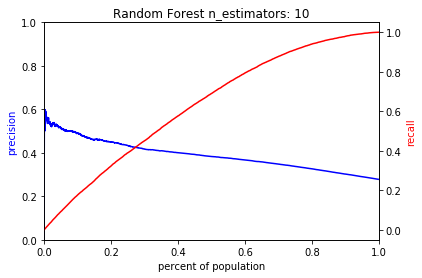

----------

Random Forest n_estimators: 20
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.4615151947415761:

True negatives: 22694.00
False positives: 792.00
False negatives: 8197.00
True positives: 835.00

    accuracy 0.72
    precision 0.51
    recall 0.09
    f1 0.16
ROC AUC Score 0.68


<Figure size 432x288 with 0 Axes>

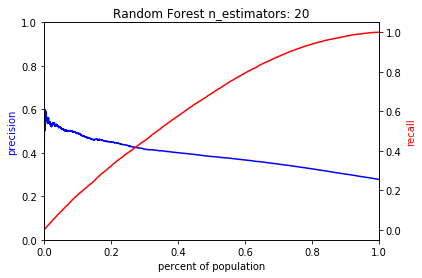

----------

Random Forest max_depth: 5
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.4615151947415761:

True negatives: 22694.00
False positives: 792.00
False negatives: 8197.00
True positives: 835.00

    accuracy 0.72
    precision 0.51
    recall 0.09
    f1 0.16
ROC AUC Score 0.68


<Figure size 432x288 with 0 Axes>

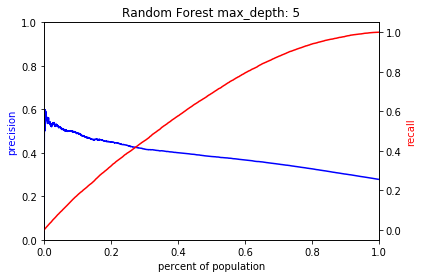

----------

Random Forest max_depth: 10
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.4615151947415761:

True negatives: 22695.00
False positives: 791.00
False negatives: 8197.00
True positives: 835.00

    accuracy 0.72
    precision 0.51
    recall 0.09
    f1 0.16
ROC AUC Score 0.68


<Figure size 432x288 with 0 Axes>

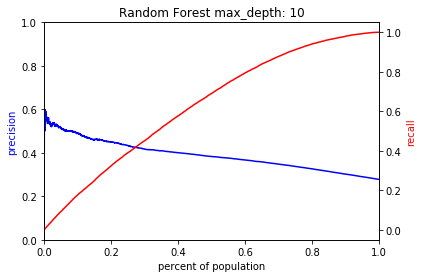

----------

Random Forest max_features: sqrt
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.46151519474157593:

True negatives: 22694.00
False positives: 792.00
False negatives: 8197.00
True positives: 835.00

    accuracy 0.72
    precision 0.51
    recall 0.09
    f1 0.16
ROC AUC Score 0.68


<Figure size 432x288 with 0 Axes>

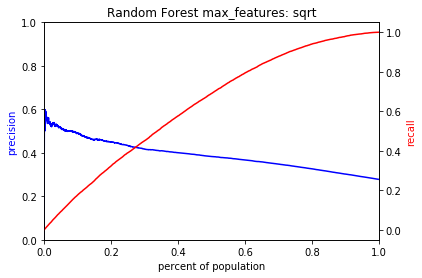

----------

Random Forest max_features: log2
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.4615151947415761:

True negatives: 22694.00
False positives: 792.00
False negatives: 8197.00
True positives: 835.00

    accuracy 0.72
    precision 0.51
    recall 0.09
    f1 0.16
ROC AUC Score 0.68


<Figure size 432x288 with 0 Axes>

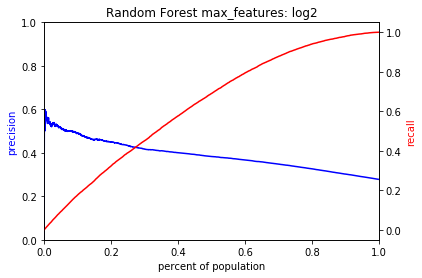

----------

Random Forest min_samples_split: 2
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.4615151947415761:

True negatives: 22695.00
False positives: 791.00
False negatives: 8197.00
True positives: 835.00

    accuracy 0.72
    precision 0.51
    recall 0.09
    f1 0.16
ROC AUC Score 0.68


<Figure size 432x288 with 0 Axes>

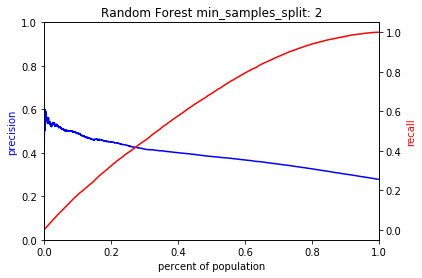

----------

Random Forest min_samples_split: 10
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.4615151947415761:

True negatives: 22695.00
False positives: 791.00
False negatives: 8197.00
True positives: 835.00

    accuracy 0.72
    precision 0.51
    recall 0.09
    f1 0.16
ROC AUC Score 0.68


<Figure size 432x288 with 0 Axes>

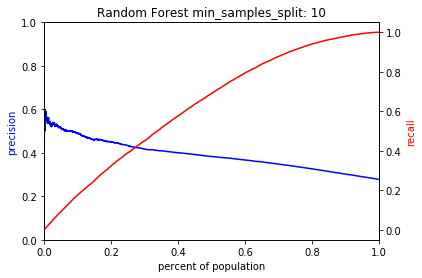

----------

Random Forest n_jobs: -1
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

At threshold 0.4615151947415761:

True negatives: 22694.00
False positives: 792.00
False negatives: 8197.00
True positives: 835.00

    accuracy 0.72
    precision 0.51
    recall 0.09
    f1 0.16
ROC AUC Score 0.68


<Figure size 432x288 with 0 Axes>

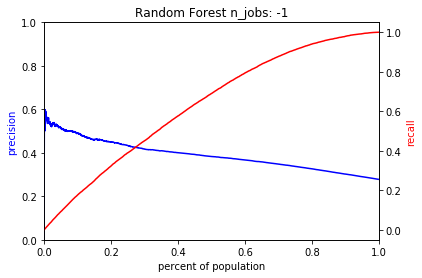

----------

Ada Boost algorithm: SAMME
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 10, 'random_state': N

<Figure size 432x288 with 0 Axes>

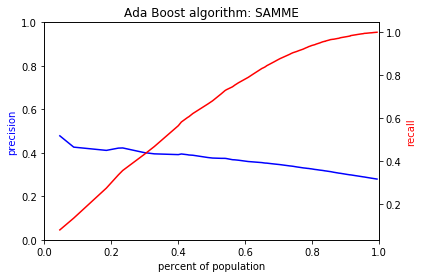

----------

Ada Boost algorithm: SAMME.R
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 10, 'random_state':

<Figure size 432x288 with 0 Axes>

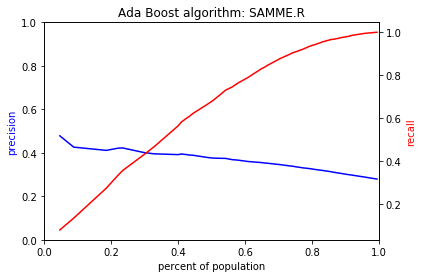

----------

Ada Boost n_estimators: 1
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 10, 'random_state': No

<Figure size 432x288 with 0 Axes>

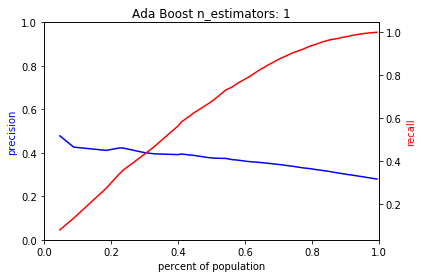

----------

Ada Boost n_estimators: 10
{'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 10, 'random_state': N

<Figure size 432x288 with 0 Axes>

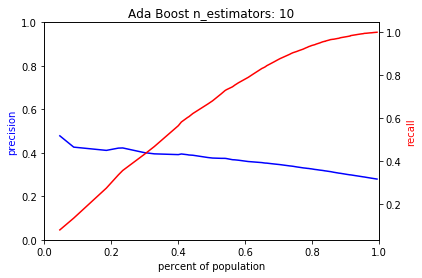

----------

Logistic Regression penalty: l1
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.49596595353528844:

True negatives: 22616.00
False positives: 870.00
False negatives: 8275.00
True positives: 757.00

    accuracy 0.72
    precision 0.47
    recall 0.08
    f1 0.14
ROC AUC Score 0.66


<Figure size 432x288 with 0 Axes>

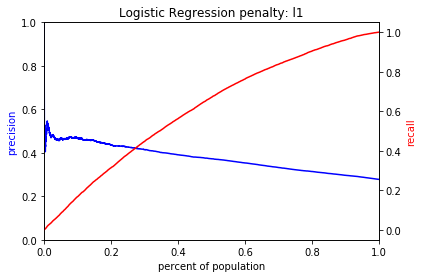

----------

Logistic Regression penalty: l2
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.49596595353528844:

True negatives: 22616.00
False positives: 870.00
False negatives: 8275.00
True positives: 757.00

    accuracy 0.72
    precision 0.47
    recall 0.08
    f1 0.14
ROC AUC Score 0.66


<Figure size 432x288 with 0 Axes>

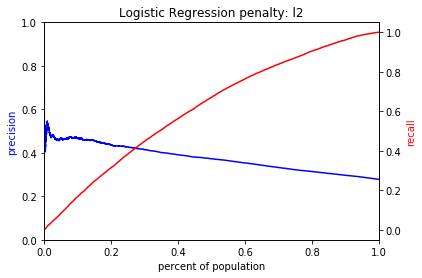

----------

Logistic Regression C: 0.001
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.49596595353528844:

True negatives: 22616.00
False positives: 870.00
False negatives: 8275.00
True positives: 757.00

    accuracy 0.72
    precision 0.47
    recall 0.08
    f1 0.14
ROC AUC Score 0.66


<Figure size 432x288 with 0 Axes>

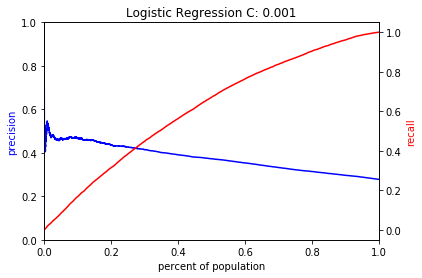

----------

Logistic Regression C: 0.1
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.49596595353528844:

True negatives: 22616.00
False positives: 870.00
False negatives: 8275.00
True positives: 757.00

    accuracy 0.72
    precision 0.47
    recall 0.08
    f1 0.14
ROC AUC Score 0.66


<Figure size 432x288 with 0 Axes>

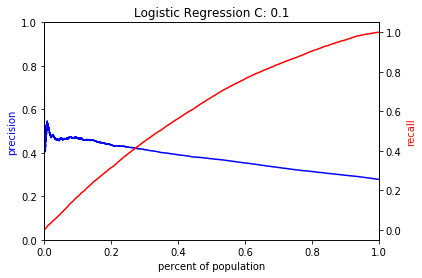

----------

Logistic Regression C: 1
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

At threshold 0.49596595353528844:

True negatives: 22616.00
False positives: 870.00
False negatives: 8275.00
True positives: 757.00

    accuracy 0.72
    precision 0.47
    recall 0.08
    f1 0.14
ROC AUC Score 0.66


<Figure size 432x288 with 0 Axes>

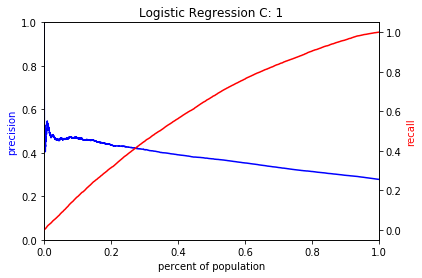

----------

SVM penalty: l2
{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 0, 'tol': 0.0001, 'verbose': 0}

At threshold -0.6884353800185185:

True negatives: 22429.00
False positives: 1057.00
False negatives: 8462.00
True positives: 570.00

    accuracy 0.71
    precision 0.35
    recall 0.06
    f1 0.11
ROC AUC Score 0.56


<Figure size 432x288 with 0 Axes>

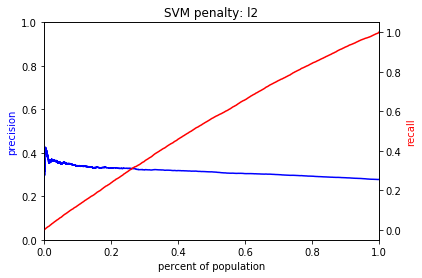

----------

Decision Tree criterion: gini
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.5:

True negatives: 22574.00
False positives: 912.00
False negatives: 8261.00
True positives: 771.00

    accuracy 0.72
    precision 0.46
    recall 0.09
    f1 0.14
ROC AUC Score 0.66


<Figure size 432x288 with 0 Axes>

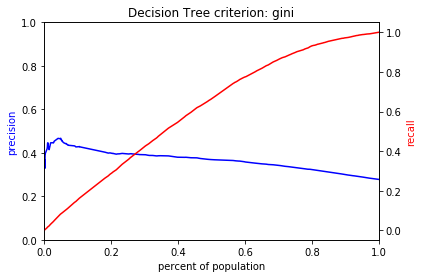

----------

Decision Tree criterion: entropy
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.5:

True negatives: 22574.00
False positives: 912.00
False negatives: 8261.00
True positives: 771.00

    accuracy 0.72
    precision 0.46
    recall 0.09
    f1 0.14
ROC AUC Score 0.66


<Figure size 432x288 with 0 Axes>

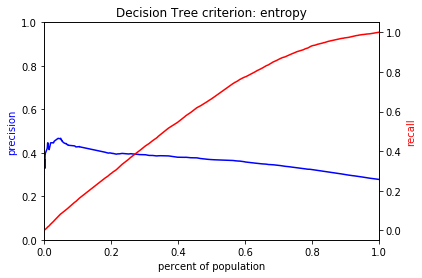

----------

Decision Tree max_depth: 1
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.5:

True negatives: 22574.00
False positives: 912.00
False negatives: 8261.00
True positives: 771.00

    accuracy 0.72
    precision 0.46
    recall 0.09
    f1 0.14
ROC AUC Score 0.66


<Figure size 432x288 with 0 Axes>

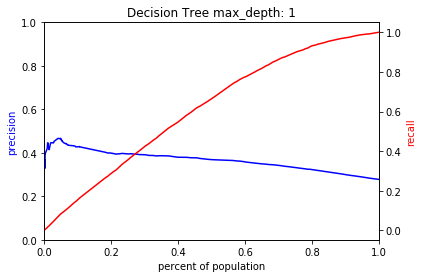

----------

Decision Tree max_depth: 5
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.5:

True negatives: 22574.00
False positives: 912.00
False negatives: 8261.00
True positives: 771.00

    accuracy 0.72
    precision 0.46
    recall 0.09
    f1 0.14
ROC AUC Score 0.66


<Figure size 432x288 with 0 Axes>

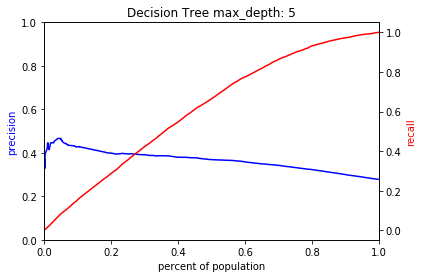

----------

Decision Tree max_depth: 10
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.5:

True negatives: 22574.00
False positives: 912.00
False negatives: 8261.00
True positives: 771.00

    accuracy 0.72
    precision 0.46
    recall 0.09
    f1 0.14
ROC AUC Score 0.66


<Figure size 432x288 with 0 Axes>

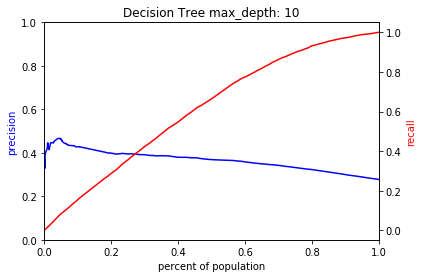

----------

Decision Tree max_features: None
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.5:

True negatives: 22574.00
False positives: 912.00
False negatives: 8261.00
True positives: 771.00

    accuracy 0.72
    precision 0.46
    recall 0.09
    f1 0.14
ROC AUC Score 0.66


<Figure size 432x288 with 0 Axes>

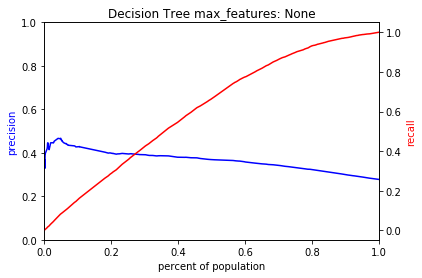

----------

Decision Tree max_features: sqrt
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.5:

True negatives: 22574.00
False positives: 912.00
False negatives: 8261.00
True positives: 771.00

    accuracy 0.72
    precision 0.46
    recall 0.09
    f1 0.14
ROC AUC Score 0.66


<Figure size 432x288 with 0 Axes>

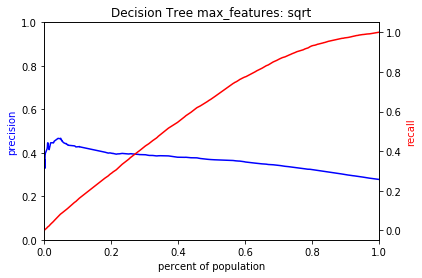

----------

Decision Tree max_features: log2
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.5:

True negatives: 22574.00
False positives: 912.00
False negatives: 8261.00
True positives: 771.00

    accuracy 0.72
    precision 0.46
    recall 0.09
    f1 0.14
ROC AUC Score 0.66


<Figure size 432x288 with 0 Axes>

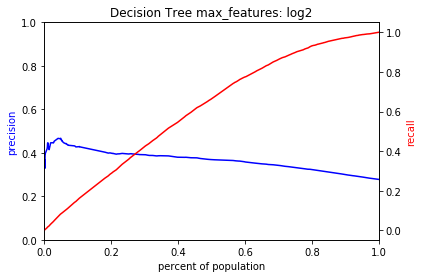

----------

Decision Tree min_samples_split: 2
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.5:

True negatives: 22574.00
False positives: 912.00
False negatives: 8261.00
True positives: 771.00

    accuracy 0.72
    precision 0.46
    recall 0.09
    f1 0.14
ROC AUC Score 0.66


<Figure size 432x288 with 0 Axes>

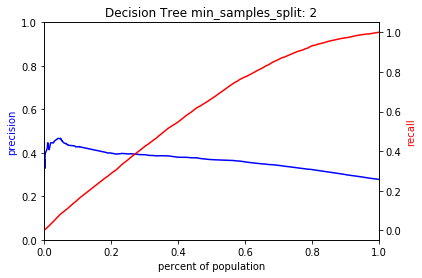

----------

Decision Tree min_samples_split: 5
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

At threshold 0.5:

True negatives: 22574.00
False positives: 912.00
False negatives: 8261.00
True positives: 771.00

    accuracy 0.72
    precision 0.46
    recall 0.09
    f1 0.14
ROC AUC Score 0.66


<Figure size 432x288 with 0 Axes>

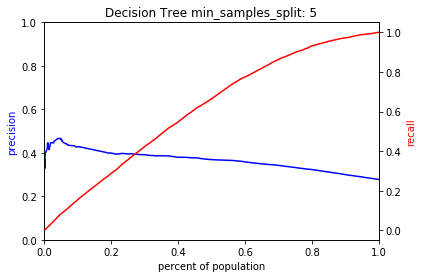

----------

KNN n_neighbors: 1
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.6406292206553784:

True negatives: 22505.00
False positives: 981.00
False negatives: 8386.00
True positives: 646.00

    accuracy 0.71
    precision 0.40
    recall 0.07
    f1 0.12
ROC AUC Score 0.61


<Figure size 432x288 with 0 Axes>

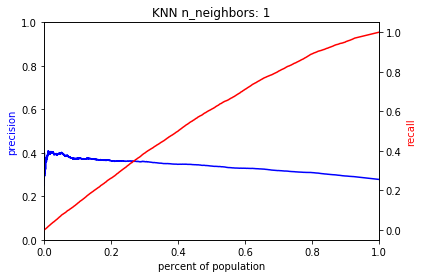

----------

KNN n_neighbors: 5
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.6406292206553784:

True negatives: 22505.00
False positives: 981.00
False negatives: 8386.00
True positives: 646.00

    accuracy 0.71
    precision 0.40
    recall 0.07
    f1 0.12
ROC AUC Score 0.61


<Figure size 432x288 with 0 Axes>

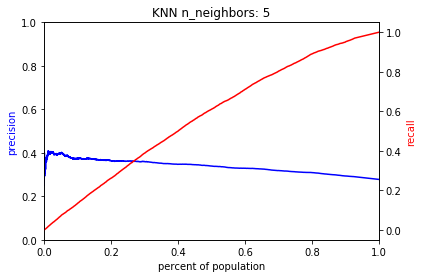

----------

KNN n_neighbors: 10
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.6406292206553784:

True negatives: 22505.00
False positives: 981.00
False negatives: 8386.00
True positives: 646.00

    accuracy 0.71
    precision 0.40
    recall 0.07
    f1 0.12
ROC AUC Score 0.61


<Figure size 432x288 with 0 Axes>

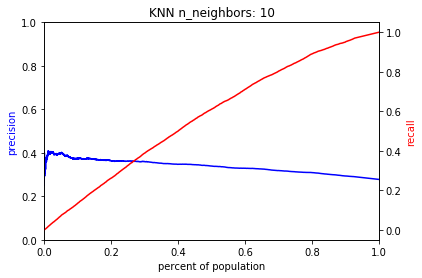

----------

KNN weights: uniform
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.6406292206553784:

True negatives: 22505.00
False positives: 981.00
False negatives: 8386.00
True positives: 646.00

    accuracy 0.71
    precision 0.40
    recall 0.07
    f1 0.12
ROC AUC Score 0.61


<Figure size 432x288 with 0 Axes>

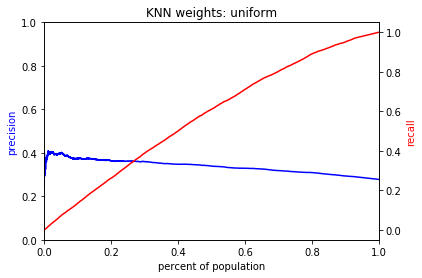

----------

KNN weights: distance
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.6406292206553784:

True negatives: 22505.00
False positives: 981.00
False negatives: 8386.00
True positives: 646.00

    accuracy 0.71
    precision 0.40
    recall 0.07
    f1 0.12
ROC AUC Score 0.61


<Figure size 432x288 with 0 Axes>

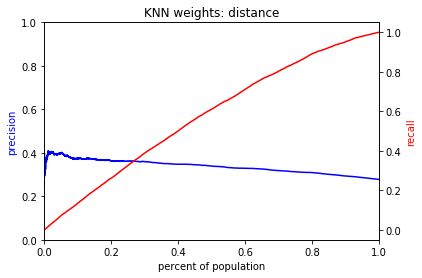

----------

KNN algorithm: auto
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.6406292206553784:

True negatives: 22505.00
False positives: 981.00
False negatives: 8386.00
True positives: 646.00

    accuracy 0.71
    precision 0.40
    recall 0.07
    f1 0.12
ROC AUC Score 0.61


<Figure size 432x288 with 0 Axes>

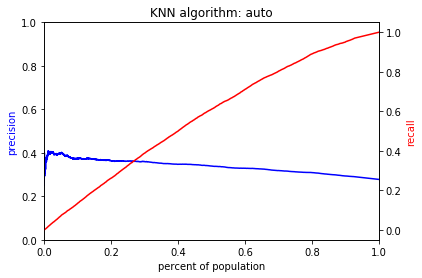

----------

KNN algorithm: ball_tree
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.6406292206553784:

True negatives: 22505.00
False positives: 981.00
False negatives: 8386.00
True positives: 646.00

    accuracy 0.71
    precision 0.40
    recall 0.07
    f1 0.12
ROC AUC Score 0.61


<Figure size 432x288 with 0 Axes>

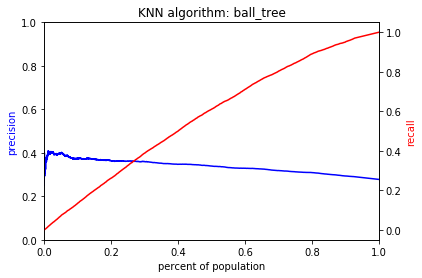

----------

KNN algorithm: kd_tree
{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}

At threshold 0.6406292206553784:

True negatives: 22505.00
False positives: 981.00
False negatives: 8386.00
True positives: 646.00

    accuracy 0.71
    precision 0.40
    recall 0.07
    f1 0.12
ROC AUC Score 0.61


<Figure size 432x288 with 0 Axes>

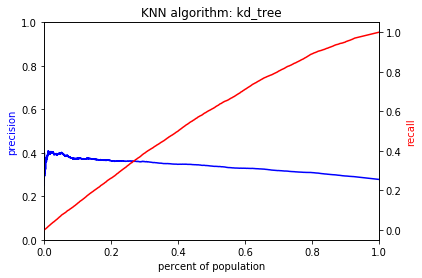

----------



In [84]:
for clf_name, cutoff in cutoffs.items():
    fitted_clf = {clf_name: fitted_clfs.get(clf_name)}
    pp.eval_metrics(train_test_sets[2][1], features, fitted_clf, [cutoff])

If DonorsChoose.org wanted to ensure that among the projects they choose to feature on the page, as many as possible were truly at risk of not being funded within 60 days, they should choose a model with high precision. In other words, among the projects this model deems to be at risk, many of them would be correctly at risk. Of the models shown above, the Random Forest models had the highest precision, at 0.49. Among the projects in the test set used in the Random Forest models, 49% really ended up not being funded within 60 days. About 27.8% of the projects in this test set overall did not get funded within 60 days, so using any of the Random Forest models would be significantly better than randomly selecting projects to be featured.

Another evaluation metric DonorsChoose.org may care about is recall. That is, among all the projects at risk of not being fully funded within 60 days, how many will they correctly choose to feature. The models above with the highest recall for which we can choose 5% of the population were the Ada Boost models with recall of 0.14. Had DonorsChoose.org used the Ada Boost model in this test set, 14% of projects that did not get fully funded within 60 days would have been specially featured.